# Noising Experiments for q = 0 and Gaussian Noise


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
from utils.images_generator import gaussian_noise_gs, normalize_img_to_0_255, generate_histogram, colored_noise, uniform_image
from utils.experiments_functions import get_img_info
from itertools import combinations
from skimage import data
from skimage.color import rgb2gray
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection
from matplotlib.legend_handler import HandlerBase

## Imagens default

Saving

In [12]:
default_images = {
    'colored_k6':normalize_img_to_0_255(colored_noise(6, (122, 122))),
    'uniform 127':uniform_image(127, (122, 122))
}
results_image_path = "results/noise_analysis/q0"
for idx,image_name in enumerate(default_images):
    # reads the image
    gs_image = default_images[image_name]
    image_title = image_name
    print(image_title, f"{idx+1}/{len(image_name)}")    
    im = Image.fromarray(gs_image)
    im = im.convert('RGB')
    im.save(f"{results_image_path}/{image_name}.png")

colored_k6 1/10
uniform 127 2/11


c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: divide by zero encountered in divide
  y_2 = y / f**(k/2)
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: invalid value encountered in divide
  y_2 = y / f**(k/2)


In [13]:
# sets the default images 
default_images = {
    'colored_k6':normalize_img_to_0_255(colored_noise(6, (122, 122))),
    'uniform 127':uniform_image(127, (122, 122))
}
image_data_list = []
for gs_image_name in default_images:
    gs_image = default_images[gs_image_name]
    # extract metrics
    print(f"Extracting data for {gs_image_name}")
    image_data = get_img_info(gs_image, q_linspace = [0])
    image_data['image_name'] = gs_image_name
    image_data_list.append(image_data)

Extracting data for colored_k6
Extracting data for uniform 127


In [14]:
image_data_list

[   q  Smoothness  Curve structure  Weighted Entropy Correct  \
 0  0    0.632584         0.032716                  0.695031   
 
    Weighted Complexity Correct     prob0     prob1     prob2  image_name  
 0                      0.30805  0.965918  0.033399  0.000683  colored_k6  ,
    q  Smoothness  Curve structure  Weighted Entropy Correct  \
 0  0    0.666667              0.0                      -0.0   
 
    Weighted Complexity Correct  prob0  prob1  prob2   image_name  
 0                         -0.0    1.0    0.0    0.0  uniform 127  ]

In [15]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux

q  Smoothness  Curve structure  Weighted Entropy Correct  \
0  0    0.632584         0.032716                  0.695031   
1  0    0.666667         0.000000                 -0.000000   

   Weighted Complexity Correct     prob0     prob1     prob2   image_name  
0                      0.30805  0.965918  0.033399  0.000683   colored_k6  
1                     -0.00000  1.000000  0.000000  0.000000  uniform 127

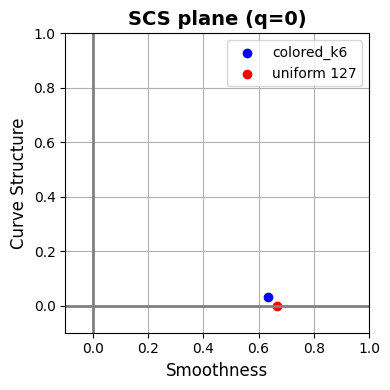

In [16]:
figname_to_color = {
    'colored_k6': 'blue',
    'uniform 127': 'red'
}
unique_default_images = data_default_aux['image_name'].unique()

plt.subplots(figsize=(4,4))
plt.axhline(y=0, lw=2, color='gray')
plt.axvline(x=0, lw=2, color='gray')

for i, imageName in enumerate(unique_default_images):
    # Filter DataFrame for the current imagename
    df_data_filtered = data_default_aux[(data_default_aux['image_name'] == imageName)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName], label=f"{imageName}")

# Set title and labels for the subplot
plt.title(f'SCS plane (q=0)', fontsize=14, fontweight='bold')
plt.xlabel('Smoothness', fontsize=12)
plt.ylabel('Curve Structure', fontsize=12)
plt.xlim([-0.1, 1])
plt.ylim([-0.1, 1])
plt.grid(True)
plt.legend()
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/scs_default.png', bbox_inches='tight')
# Show the plot
plt.show()

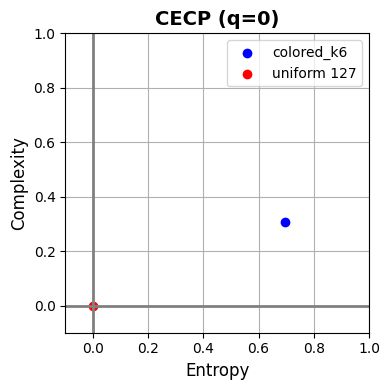

In [17]:
figname_to_color = {
    'colored_k6': 'blue',
    'uniform 127': 'red'
}
unique_default_images = data_default_aux['image_name'].unique()

plt.subplots(figsize=(4,4))
plt.axhline(y=0, lw=2, color='gray')
plt.axvline(x=0, lw=2, color='gray')

for i, imageName in enumerate(unique_default_images):
    # Filter DataFrame for the current imagename
    df_data_filtered = data_default_aux[(data_default_aux['image_name'] == imageName)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    scatter = plt.scatter(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], c=figname_to_color[imageName], label=f"{imageName}")

# Set title and labels for the subplot
plt.title(f'CECP (q=0)', fontsize=14, fontweight='bold')
plt.xlabel('Entropy', fontsize=12)
plt.ylabel('Complexity', fontsize=12)
plt.xlim([-0.1, 1])
plt.ylim([-0.1, 1])
plt.grid(True)
plt.legend()
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/cecp_default.png', bbox_inches='tight')
# Show the plot
plt.show()

--------------------------

## Images dataset

In [2]:
image_data = pd.read_csv(f"results/noise_analysis/gaussian/gaussian_analysis.csv")
image_data_v2 = pd.read_csv(f"results/noise_analysis/gaussian/gaussian_analysis_v2.csv")
image_data_default = pd.read_csv(f"results/noise_analysis/gaussian/gaussian_analysis_default.csv")


In [3]:
image_data = image_data_v2

In [4]:
image_data.head()

q  Smoothness  Curve structure  Weighted Entropy Correct  \
0   0    0.230972         0.193908                  0.932321   
1   2    0.379436         0.225311                  0.868004   
2   5    0.466848         0.194276                  0.798928   
3  10    0.506755         0.159835                  0.699778   
4   0    0.122510         0.140496                  0.983832   

   Weighted Complexity Correct     prob0     prob1     prob2  \
0                     0.084523  0.564306  0.314801  0.120893   
1                     0.164374  0.712770  0.256271  0.030960   
2                     0.232790  0.800181  0.197047  0.002771   
3                     0.284605  0.840089  0.159873  0.000038   
4                     0.021392  0.455843  0.342326  0.201830   

                  image_name  mean_value  sd_value  
0  canesugar01-r000-s001.png          50         0  
1  canesugar01-r000-s001.png          50         0  
2  canesugar01-r000-s001.png          50         0  
3  canesugar01-r000-s001.png          50         0  
4  canesugar01-r000-s001.png         -50        10

In [5]:
image_data_default.head()

q  Smoothness  Curve structure  Weighted Entropy Correct  \
0 -2.0    0.382341         0.004843                  0.839389   
1 -1.0    0.591636         0.053651                  0.730293   
2  0.0    0.637775         0.028072                  0.663286   
3  1.0    0.648960         0.017677                  0.630566   
4  2.0    0.653820         0.012846                  0.603298   

   Weighted Complexity Correct     prob0     prob1         prob2  image_name  \
0                     0.194686  0.715674  0.144584  1.397416e-01  colored_k6   
1                     0.276027  0.924969  0.064341  1.069023e-02  colored_k6   
2                     0.313664  0.971109  0.028482  4.098081e-04  colored_k6   
3                     0.321912  0.982293  0.017692  1.461078e-05  colored_k6   
4                     0.323580  0.987153  0.012846  5.297810e-07  colored_k6   

   mean_value  sd_value  
0         -50         0  
1         -50         0  
2         -50         0  
3         -50         0  
4         -50         0

In [6]:
filenames = image_data.image_name.unique()
img_default_names = image_data_default.image_name.unique()
print(filenames)
print(img_default_names)

['canesugar01-r000-s001.png' 'canvas01-r000-s001.png'
 'couscous01-r000-s001.png' 'fabric01-r000-s001.png'
 'fabric02-r000-s001.png' 'fabric03-r000-s001.png'
 'fabric04-r000-s001.png' 'fabric05-r000-s001.png'
 'flaxseed01-r000-s001.png' 'knitwear01-r000-s001.png'
 'knitwear02-r000-s001.png' 'knitwear03-r000-s001.png'
 'lentils01-r000-s001.png' 'oatmeal01-r000-s001.png'
 'pearlsugar01-r000-s001.png' 'rice01-r000-s001.png' 'rug01-r000-s001.png'
 'ryeflakes01-r000-s001.png' 'seeds01-r000-s001.png'
 'seeds02-r000-s001.png' 'sprinkles01-r000-s001.png'
 'tile01-r000-s001.png' 'towel01-r000-s001.png' 'wheat01-r000-s001.png'
 'wool01-r000-s001.png']
['colored_k6' 'uniform 127']


In [7]:
print("Image data MEANS unique",image_data.mean_value.unique())
print("Image data SD unique",image_data.sd_value.unique())
print("Default data MEANS unique",image_data_default.mean_value.unique())
print("Default data SD unique",image_data_default.sd_value.unique())

Image data MEANS unique [ 50 -50 -30 -10   0  10  30]
Image data SD unique [ 0 10 20 30 40 50 60 70]
Default data MEANS unique [-50 -20   0  20  50]
Default data SD unique [ 0 10 20 40 50]


In [8]:
default_data = image_data_default 
dataset_data = image_data[(image_data['image_name'] != 'colored_k6') & (image_data['image_name'] != 'uniform 127')]

In [9]:
print(dataset_data.shape)
dataset_data.head()

(5600, 11)


q  Smoothness  Curve structure  Weighted Entropy Correct  \
0   0    0.230972         0.193908                  0.932321   
1   2    0.379436         0.225311                  0.868004   
2   5    0.466848         0.194276                  0.798928   
3  10    0.506755         0.159835                  0.699778   
4   0    0.122510         0.140496                  0.983832   

   Weighted Complexity Correct     prob0     prob1     prob2  \
0                     0.084523  0.564306  0.314801  0.120893   
1                     0.164374  0.712770  0.256271  0.030960   
2                     0.232790  0.800181  0.197047  0.002771   
3                     0.284605  0.840089  0.159873  0.000038   
4                     0.021392  0.455843  0.342326  0.201830   

                  image_name  mean_value  sd_value  
0  canesugar01-r000-s001.png          50         0  
1  canesugar01-r000-s001.png          50         0  
2  canesugar01-r000-s001.png          50         0  
3  canesugar01-r000-s001.png          50         0  
4  canesugar01-r000-s001.png         -50        10

### Plotting the plane for the default images

In [10]:
q_value = 0
default_data_q0 = default_data[(default_data['q'] == q_value)]
print(default_data.shape)
print(default_data_q0.shape)
default_data_q0.head()

(1150, 11)
(50, 11)


q  Smoothness  Curve structure  Weighted Entropy Correct  \
2   0.0    0.637775         0.028072                  0.663286   
25  0.0    0.016984         0.009699                  0.999646   
48  0.0    0.002504         0.006284                  0.999665   
71  0.0    0.001616         0.001298                  0.999670   
94  0.0   -0.000911        -0.014480                  0.999794   

    Weighted Complexity Correct     prob0     prob1     prob2  image_name  \
2                      0.313664  0.971109  0.028482  0.000410  colored_k6   
25                     0.000463  0.350318  0.329691  0.319992  colored_k6   
48                     0.000438  0.335838  0.335223  0.328939  colored_k6   
71                     0.000435  0.334950  0.333174  0.331876  colored_k6   
94                     0.000269  0.332423  0.326549  0.341029  colored_k6   

    mean_value  sd_value  
2          -50         0  
25         -50        10  
48         -50        20  
71         -50        40  
94         -50        50

In [11]:
default_data[(default_data['q'] == 0) & (default_data['sd_value'] == 0)]

q  Smoothness  Curve structure  Weighted Entropy Correct  \
2     0.0    0.637775         0.028072                  0.663286   
117   0.0    0.637775         0.028072                  0.663286   
232   0.0    0.637775         0.028072                  0.663286   
347   0.0    0.637775         0.028072                  0.663286   
462   0.0    0.637775         0.028072                  0.663286   
577   0.0    0.666667         0.000000                 -0.000000   
692   0.0    0.666667         0.000000                 -0.000000   
807   0.0    0.666667         0.000000                 -0.000000   
922   0.0    0.666667         0.000000                 -0.000000   
1037  0.0    0.666667         0.000000                 -0.000000   

      Weighted Complexity Correct     prob0     prob1    prob2   image_name  \
2                        0.313664  0.971109  0.028482  0.00041   colored_k6   
117                      0.313664  0.971109  0.028482  0.00041   colored_k6   
232                      0.313664  0.971109  0.028482  0.00041   colored_k6   
347                      0.313664  0.971109  0.028482  0.00041   colored_k6   
462                      0.313664  0.971109  0.028482  0.00041   colored_k6   
577                     -0.000000  1.000000  0.000000  0.00000  uniform 127   
692                     -0.000000  1.000000  0.000000  0.00000  uniform 127   
807                     -0.000000  1.000000  0.000000  0.00000  uniform 127   
922                     -0.000000  1.000000  0.000000  0.00000  uniform 127   
1037                    -0.000000  1.000000  0.000000  0.00000  uniform 127   

      mean_value  sd_value  
2            -50         0  
117          -20         0  
232            0         0  
347           20         0  
462           50         0  
577          -50         0  
692          -20         0  
807            0         0  
922           20         0  
1037          50         0

In [12]:
default_data_q0['image_name'].unique()

array(['colored_k6', 'uniform 127'], dtype=object)

In [13]:
default_data_q0['sd_value'].unique()

array([ 0, 10, 20, 40, 50], dtype=int64)

In [26]:
default_data[(default_data['q'] == 0) & (default_data['sd_value'] == 0)]

q  Smoothness  Curve structure  Weighted Entropy Correct  \
2     0.0    0.637775         0.028072                  0.663286   
117   0.0    0.637775         0.028072                  0.663286   
232   0.0    0.637775         0.028072                  0.663286   
347   0.0    0.637775         0.028072                  0.663286   
462   0.0    0.637775         0.028072                  0.663286   
577   0.0    0.666667         0.000000                 -0.000000   
692   0.0    0.666667         0.000000                 -0.000000   
807   0.0    0.666667         0.000000                 -0.000000   
922   0.0    0.666667         0.000000                 -0.000000   
1037  0.0    0.666667         0.000000                 -0.000000   

      Weighted Complexity Correct     prob0     prob1    prob2   image_name  \
2                        0.313664  0.971109  0.028482  0.00041   colored_k6   
117                      0.313664  0.971109  0.028482  0.00041   colored_k6   
232                      0.313664  0.971109  0.028482  0.00041   colored_k6   
347                      0.313664  0.971109  0.028482  0.00041   colored_k6   
462                      0.313664  0.971109  0.028482  0.00041   colored_k6   
577                     -0.000000  1.000000  0.000000  0.00000  uniform 127   
692                     -0.000000  1.000000  0.000000  0.00000  uniform 127   
807                     -0.000000  1.000000  0.000000  0.00000  uniform 127   
922                     -0.000000  1.000000  0.000000  0.00000  uniform 127   
1037                    -0.000000  1.000000  0.000000  0.00000  uniform 127   

      mean_value  sd_value  
2            -50         0  
117          -20         0  
232            0         0  
347           20         0  
462           50         0  
577          -50         0  
692          -20         0  
807            0         0  
922           20         0  
1037          50         0

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_35460\3568067573.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_35460\3568067573.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_35460\3568067573.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


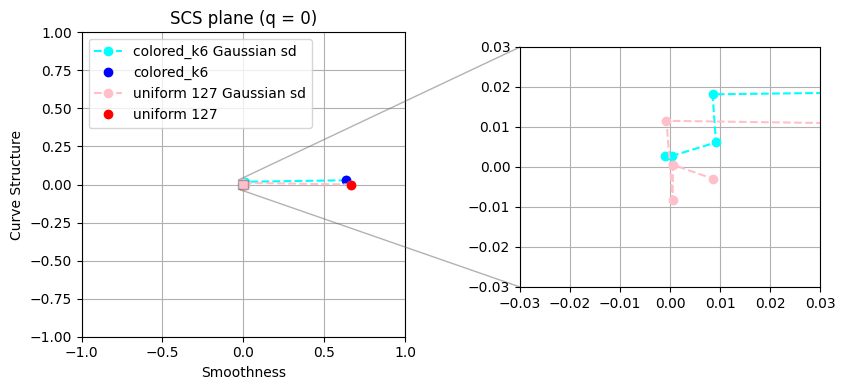

In [11]:
figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise_sd': 'cyan',
    'colored_k6_noise_mean': 'darkviolet',
    'uniform 127': 'red',
    'uniform 127_noise_sd': 'pink',
    'uniform 127_noise_mean': 'sienna'
}
unique_default_images = default_data_q0['image_name'].unique()
fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_default_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)]
    # get data varying sd and setting mean as 0
    df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0]
    ax_main.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
    axins.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
    # get data varying mean and setting sd as 20
    # df_noised_mean = df_data_filtered[df_data_filtered['sd_value'] == 20]
    # ax_main.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    # axins.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == 0)]
    # plot it
    ax_main.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
    axins.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])

# Set title and labels for the subplot
ax_main.set_title(f'SCS plane (q = {q_value})')
ax_main.set_xlabel('Smoothness')
ax_main.set_ylabel('Curve Structure')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = -0.03, 0.03, -0.03, 0.03
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
# plt.savefig(f'results/noise_analysis/q0/gaussian/gaussian_default_images_scs_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_35460\2993468634.py:136: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


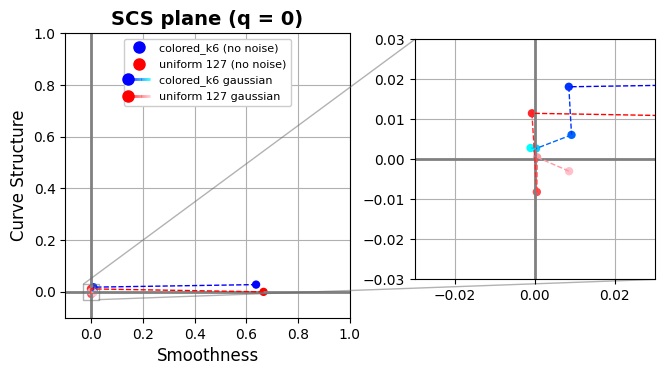

In [127]:
# Custom handler for gradient legend entries
class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        # Create gradient line segments
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        # Add starting marker
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

# Custom class to hold gradient information
class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise_sd': 'cyan',
    'colored_k6_noise_mean': 'darkviolet',
    'uniform 127': 'red',
    'uniform 127_noise_sd': 'pink',
    'uniform 127_noise_mean': 'sienna'
}

unique_default_images = default_data_q0['image_name'].unique()
fig, ax_main = plt.subplots(figsize=(5,4))
# axins = plt.axes([0.7, 0.27, 0.6, 0.6])
# axins = plt.axes([0.75, 0.27, 0.6, 0.6])
axins = plt.axes([0.7, 0.27, 0.6, 0.6])
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')

# Lists to store legend elements
gradient_handles = []
original_handles = []

for i, imageName in enumerate(unique_default_images):
    df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)]
    
    # Process noise_sd data
    df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0]
    df_noised_sd_sorted = df_noised_sd.sort_values('sd_value')
    
    if len(df_noised_sd_sorted) >= 2:
        x = df_noised_sd_sorted['Smoothness'].values
        y = df_noised_sd_sorted['Curve structure'].values
        sd = df_noised_sd_sorted['sd_value'].values
        
        # Create segments for LineCollection
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Create colormap from original to noise_sd color
        original_color = figname_to_color[imageName]
        noise_sd_color = figname_to_color[f"{imageName}_noise_sd"]
        cmap = mcolors.LinearSegmentedColormap.from_list(f"{imageName}_cmap", [original_color, noise_sd_color])
        norm = plt.Normalize(vmin=sd.min(), vmax=sd.max())
        
        # Create LineCollection for main and inset axes
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, linestyle='--', linewidth=1)
            lc.set_array(sd)
            ax.add_collection(lc)
        
        # Scatter plot markers with gradient colors
        colors = cmap(norm(sd))
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o')
        axins.scatter(x, y, c=colors, edgecolors='none', marker='o')
        
        # Create gradient legend handles
        gradient_handles.append(GradientLegendHandle(original_color, noise_sd_color))
        
    # Add original data point to legend
    original_handles.append(
        plt.Line2D([], [], color=original_color, marker='o', 
                 linestyle='None', markersize=8, label=f"{imageName} (no noise)")
    )

# Create combined legend
all_handles = original_handles + gradient_handles
all_labels = [h.get_label() if hasattr(h, 'get_label') else f"{imageName} gaussian" 
              for h, imageName in zip(all_handles, list(unique_default_images)*2)]

ax_main.legend(
    all_handles,
    all_labels,
    handler_map={GradientLegendHandle: HandlerGradientLines()},
    loc='best',
    framealpha=1,
    fontsize=8
)

# Configure axes
ax_main.set_title(f'SCS plane (q = {q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Smoothness', fontsize=12)
ax_main.set_ylabel('Curve Structure', fontsize=12)
ax_main.set_aspect('equal')  # Force square aspect ratio
ax_main.set_xlim([-0.1, 1])
ax_main.set_ylim([-0.1, 1])
ax_main.grid(True)

# Inset axes settings
axins.set_xlim(-0.03, 0.03)
axins.set_ylim(-0.03, 0.03)
axins.set_aspect('equal')  # Force square aspect ratio
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

plt.tight_layout()
plt.savefig(f'results/noise_analysis/q0/gaussian/gaussian_default_images_scs_q{q_value}.png', bbox_inches='tight')
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_24580\3908736481.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_sd['Weighted Entropy Correct'], df_noised_sd['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_24580\3908736481.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_sd['Weighted Entropy Correct'], df_noised_sd['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_24580\3908736481.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "*k--"

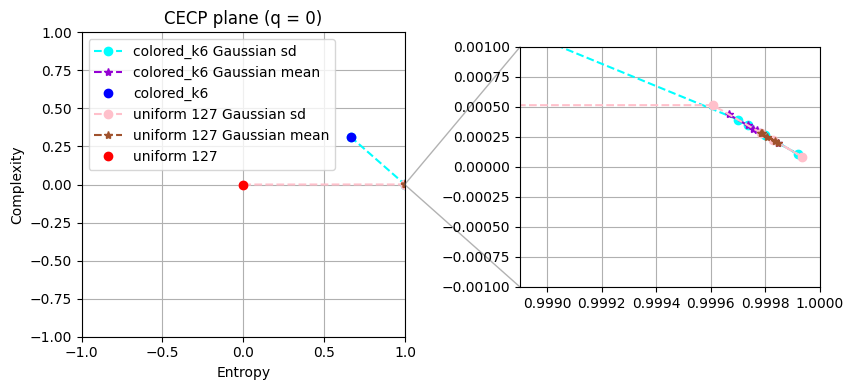

In [102]:
figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise_sd': 'cyan',
    'colored_k6_noise_mean': 'darkviolet',
    'uniform 127': 'red',
    'uniform 127_noise_sd': 'pink',
    'uniform 127_noise_mean': 'sienna'
}
unique_default_images = default_data_q0['image_name'].unique()
fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_default_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)]
    # get data varying sd and setting mean as 0
    df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0]
    ax_main.plot(df_noised_sd['Weighted Entropy Correct'], df_noised_sd['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
    axins.plot(df_noised_sd['Weighted Entropy Correct'], df_noised_sd['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
    # get data varying mean and setting sd as 20
    df_noised_mean = df_data_filtered[df_data_filtered['sd_value'] == 20]
    ax_main.plot(df_noised_mean['Weighted Entropy Correct'], df_noised_mean['Weighted Complexity Correct'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    axins.plot(df_noised_mean['Weighted Entropy Correct'], df_noised_mean['Weighted Complexity Correct'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == 0)]
    # plot it
    ax_main.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
    axins.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Weighted Entropy Correct vs. Weighted Complexity Correct, colored by q
    # scatter = plt.scatter(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], c=figname_to_color[imageName])

# Set title and labels for the subplot
ax_main.set_title(f'CECP plane (q = {q_value})')
ax_main.set_xlabel('Entropy')
ax_main.set_ylabel('Complexity')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = 0.9989, 1, -0.001, 0.001
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/gaussian/gaussian_default_images_cecp_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_35460\4196073496.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


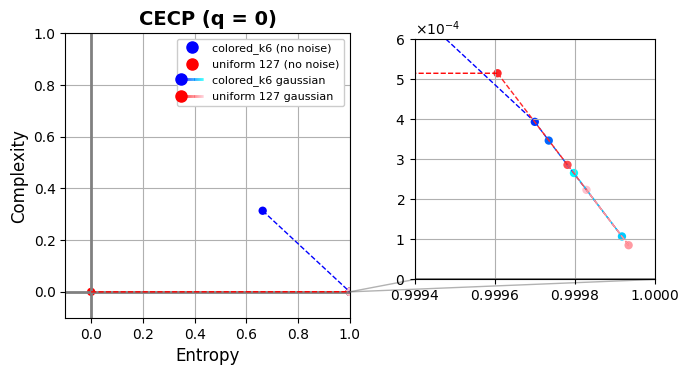

In [128]:
# Custom handler for gradient legend entries
class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        # Create gradient line segments
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        # Add starting marker
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

# Custom class to hold gradient information
class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise_sd': 'cyan',
    'colored_k6_noise_mean': 'darkviolet',
    'uniform 127': 'red',
    'uniform 127_noise_sd': 'pink',
    'uniform 127_noise_mean': 'sienna'
}

unique_default_images = default_data_q0['image_name'].unique()
fig, ax_main = plt.subplots(figsize=(5,4))
# axins = plt.axes([0.75, 0.27, 0.6, 0.6])
axins = plt.axes([0.7, 0.27, 0.6, 0.6])
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')

# Lists to store legend elements
gradient_handles = []
original_handles = []

for i, imageName in enumerate(unique_default_images):
    df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)]
    
    # Process noise_sd data
    df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0]
    df_noised_sd_sorted = df_noised_sd.sort_values('sd_value')
    
    if len(df_noised_sd_sorted) >= 2:
        x = df_noised_sd_sorted['Weighted Entropy Correct'].values
        y = df_noised_sd_sorted['Weighted Complexity Correct'].values
        sd = df_noised_sd_sorted['sd_value'].values
        
        # Create segments for LineCollection
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Create colormap from original to noise_sd color
        original_color = figname_to_color[imageName]
        noise_sd_color = figname_to_color[f"{imageName}_noise_sd"]
        cmap = mcolors.LinearSegmentedColormap.from_list(f"{imageName}_cmap", [original_color, noise_sd_color])
        norm = plt.Normalize(vmin=sd.min(), vmax=sd.max())
        
        # Create LineCollection for main and inset axes
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, linestyle='--', linewidth=1)
            lc.set_array(sd)
            ax.add_collection(lc)
        
        # Scatter plot markers with gradient colors
        colors = cmap(norm(sd))
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o')
        axins.scatter(x, y, c=colors, edgecolors='none', marker='o')
        
        # Create gradient legend handles
        gradient_handles.append(GradientLegendHandle(original_color, noise_sd_color))
        
    # Add original data point to legend
    original_handles.append(
        plt.Line2D([], [], color=original_color, marker='o', 
                 linestyle='None', markersize=8, label=f"{imageName} (no noise)")
    )

# Create combined legend
all_handles = original_handles + gradient_handles
all_labels = [h.get_label() if hasattr(h, 'get_label') else f"{imageName} gaussian" 
              for h, imageName in zip(all_handles, list(unique_default_images)*2)]

ax_main.legend(
    all_handles,
    all_labels,
    handler_map={GradientLegendHandle: HandlerGradientLines()},
    loc='best',
    framealpha=1,
    fontsize=8
)

# Configure axes
ax_main.set_title(f'CECP (q = {q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Entropy', fontsize=12)
ax_main.set_ylabel('Complexity', fontsize=12)
ax_main.set_aspect('equal')  # Force square aspect ratio
ax_main.set_xlim([-0.1, 1])
ax_main.set_ylim([-0.1, 1])
ax_main.grid(True)

# Inset axes settings
x1, x2, y1, y2 = 0.9994, 1, 0.00, 0.0006
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_aspect('equal')  # Force square aspect ratio
axins.grid(True)
from matplotlib.ticker import ScalarFormatter
axins.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axins.yaxis.get_major_formatter().set_scientific(True)
axins.yaxis.get_major_formatter().set_powerlimits((-3, 3))
axins.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axins.xaxis.get_major_formatter().set_scientific(True)
axins.xaxis.get_major_formatter().set_powerlimits((-3, 3))  # Force small exponents
ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

plt.tight_layout()
plt.savefig(f'results/noise_analysis/q0/gaussian/gaussian_default_images_cecp_q{q_value}.png', bbox_inches='tight')
plt.show()

### Plotting the plane for the dataset images (q=0)

In [8]:
dataset_data['q'].unique()

array([ 0,  2,  5, 10], dtype=int64)

In [38]:
q_value = 10
dataset_data_q0 = dataset_data[(dataset_data['q'] == q_value)]
print(dataset_data.shape)
print(dataset_data_q0.shape)
dataset_data_q0.head()

(5600, 11)
(1400, 11)


q  Smoothness  Curve structure  Weighted Entropy Correct  \
3   10    0.506755         0.159835                  0.699778   
7   10    0.428906         0.235104                  0.722270   
11  10    0.384835         0.248065                  0.812762   
15  10    0.148089         0.327229                  0.910098   
19  10    0.171755         0.186258                  0.955777   

    Weighted Complexity Correct     prob0     prob1     prob2  \
3                      0.284605  0.840089  0.159873  0.000038   
7                      0.271847  0.762239  0.236433  0.001328   
11                     0.203289  0.718168  0.264949  0.016884   
15                     0.108553  0.481422  0.422904  0.095674   
19                     0.056285  0.505088  0.340585  0.154327   

                   image_name  mean_value  sd_value  
3   canesugar01-r000-s001.png          50         0  
7   canesugar01-r000-s001.png         -50        10  
11  canesugar01-r000-s001.png         -50        20  
15  canesugar01-r000-s001.png         -50        30  
19  canesugar01-r000-s001.png         -50        40

In [39]:
filenames_dataset = dataset_data_q0['image_name'].unique()
filenames_dataset

array(['canesugar01-r000-s001.png', 'canvas01-r000-s001.png',
       'couscous01-r000-s001.png', 'fabric01-r000-s001.png',
       'fabric02-r000-s001.png', 'fabric03-r000-s001.png',
       'fabric04-r000-s001.png', 'fabric05-r000-s001.png',
       'flaxseed01-r000-s001.png', 'knitwear01-r000-s001.png',
       'knitwear02-r000-s001.png', 'knitwear03-r000-s001.png',
       'lentils01-r000-s001.png', 'oatmeal01-r000-s001.png',
       'pearlsugar01-r000-s001.png', 'rice01-r000-s001.png',
       'rug01-r000-s001.png', 'ryeflakes01-r000-s001.png',
       'seeds01-r000-s001.png', 'seeds02-r000-s001.png',
       'sprinkles01-r000-s001.png', 'tile01-r000-s001.png',
       'towel01-r000-s001.png', 'wheat01-r000-s001.png',
       'wool01-r000-s001.png'], dtype=object)

In [83]:
dataset_data_q0['mean_value'].unique()

array([ 50, -50, -30, -10,   0,  10,  30], dtype=int64)

In [84]:
dataset_data_q0['sd_value'].unique()

array([ 0, 10, 20, 30, 40, 50, 60, 70], dtype=int64)

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_2668\2719936846.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_2668\2719936846.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "*k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")


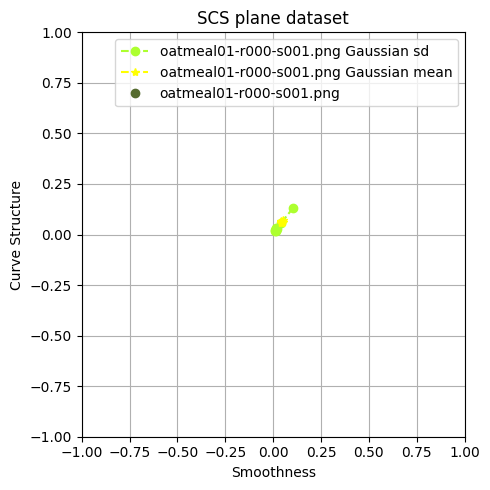

In [11]:
figname = 'oatmeal01-r000-s001.png'
figname_to_color = {
    f'{figname}': 'darkolivegreen',
    f'{figname}_noise_sd': 'greenyellow',
    f'{figname}_noise_mean': 'yellow'
}
unique_dataset_images = dataset_data_q0['image_name'].unique()
unique_dataset_images = [figname]
plt.subplots(figsize=(5, 5))

for i, imageName in enumerate(unique_dataset_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    # get data varying sd and setting mean as 0
    df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0]
    plt.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
    # get data varying mean and setting sd as 0
    df_noised_mean = df_data_filtered[df_data_filtered['sd_value'] == 20]
    plt.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == 0)]
    # plot it
    plt.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]

# Set title and labels for the subplot
plt.title(f'SCS plane dataset')
plt.xlabel('Smoothness')
plt.ylabel('Curve Structure')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.grid(True)
plt.legend()
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
# plt.savefig(f'results/noise_analysis/gaussian/planes/test.png', bbox_inches='tight')
# Show the plot
plt.show()

In [86]:
dataset_data_q0['sd_value'].unique()

array([ 0, 10, 20, 30, 40, 50, 60, 70], dtype=int64)

In [87]:
dataset_data_q0['mean_value'].unique()

array([ 50, -50, -30, -10,   0,  10,  30], dtype=int64)

In [24]:
dataset_data_q0[(dataset_data_q0['image_name'] == 'wool01-r000-s001.png') & (dataset_data_q0['mean_value'] == -50)]

q  Smoothness  Curve structure  Weighted Entropy Correct  \
5380  0    0.116090         0.158937                  0.982819   
5384  0    0.045671         0.062837                  0.997254   
5388  0    0.030508         0.061061                  0.998168   
5392  0    0.022039         0.023222                  0.999294   
5396  0    0.010974         0.024998                  0.999576   
5400  0    0.008720         0.017963                  0.999724   
5404  0    0.000182         0.016939                  0.999724   

      Weighted Complexity Correct     prob0     prob1     prob2  \
5380                     0.022876  0.449423  0.354757  0.195820   
5384                     0.003620  0.379004  0.341917  0.279079   
5388                     0.002422  0.363841  0.348610  0.287549   
5392                     0.000925  0.355372  0.333925  0.310703   
5396                     0.000556  0.344307  0.340346  0.315347   
5400                     0.000362  0.342053  0.337955  0.319992   
5404                     0.000363  0.333515  0.341712  0.324773   

                image_name  mean_value  sd_value  
5380  wool01-r000-s001.png         -50        10  
5384  wool01-r000-s001.png         -50        20  
5388  wool01-r000-s001.png         -50        30  
5392  wool01-r000-s001.png         -50        40  
5396  wool01-r000-s001.png         -50        50  
5400  wool01-r000-s001.png         -50        60  
5404  wool01-r000-s001.png         -50        70

In [ ]:
dict_color = {
    'original': 'darkolivegreen',
    'noise_sd': 'limegreen',
    'noise_mean': 'yellow'
}

amountOfImages = 25 # must be less or equal to 25
ncolsChosen = 11
chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)
chosen_filenames.sort()
# nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
nrowsChosen = amountOfImages
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(45, 4* nrowsChosen))
# Flatten the axs array for easier indexing
# axs = axs.flatten()
images_path = f'data/Sintorn/hardware'
for i, imageName in enumerate(chosen_filenames):
    # read image
    gs_image = cv2.imread(f'{images_path}/{imageName}', cv2.IMREAD_GRAYSCALE)
    # pick a mean and sd
    mean_chosen = 50
    sd_values = dataset_data_q0['sd_value'].unique()
    # original image
    axs[i][0].imshow(gs_image, cmap='gray')
    axs[i][0].set_title(f"({i+1})-{imageName.split('-')[0]}")
    for idx, sd_chosen in enumerate(sd_values):
        # noised image
        noised_image = gaussian_noise_gs(mean_chosen, sd_chosen, gs_image)
        # plot noised image
        axs[i][idx+1].imshow(noised_image, cmap='gray')
        axs[i][idx+1].set_title(f"({i+1})-{imageName.split('-')[0]} sd {sd_chosen}")

    # Filter DataFrame for the current imageName
    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    # plots the original plane and ZOOMED IN
    for index in range(9, 11):
        # get data varying sd and setting mean as 0
        df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == mean_chosen]
        axs[i][index].plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} Gaussian sd")
        # get data varying mean and setting sd as 0
        # df_noised_mean = df_data_filtered[df_data_filtered['sd_value'] == 0]
        # axs[i][index].plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=dict_color[f"noise_mean"], label=f"{imageName} Gaussian mean")
        
        # Get the original data (no noise)
        df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == mean_chosen)]
        # plot it
        axs[i][index].plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=dict_color["original"], label=f"{imageName}")
            
        # for j,sd_chosen in scatter_idxs:

        #     # Add colorbar for each subplot
        #     cbar = fig.colorbar(scatter, ax=axs[i][j])
        #     cbar.set_label('q')
        #     # Set title and labels for the subplot
        axs[i][index].set_xlabel('Smoothness')
        axs[i][index].set_ylabel('Curve Structure')
        axs[i][index].grid(True)
        axs[i][index].axhline(y=0, lw=2, color='r')
        axs[i][index].axvline(x=0, lw=2, color='r')
        if index == 9:
            axs[i][index].set_title('SCS plane')
            axs[i][index].set_xlim([-1, 1])
            axs[i][index].set_ylim([-1, 1])
        else:
            axs[i][index].set_title('SCS plane ZOOM')
            axs[i][index].set_xlim([np.min(df_noised_sd['Smoothness'])-0.1, np.max(df_noised_sd['Smoothness'])+0.1])
            axs[i][index].set_ylim([np.min(df_noised_sd['Curve structure'])-0.1, np.max(df_noised_sd['Curve structure'])+0.1])
# Adjust layout to prevent overlap
plt.tight_layout()
fig.suptitle(f"Gaussian on dataset - q = {q_value}", size='xx-large')
fig.subplots_adjust(top=0.97)
# Save
plt.savefig(f'results/noise_analysis/q0/planes/gaussian_dataset_comparing_SCSplane_q{q_value}_v2.png', bbox_inches='tight')
# Show the plot
plt.show()

### Dataset: SCS x CECP

In [69]:
dataset_data['q'].unique()

array([ 0,  2,  5, 10], dtype=int64)

In [70]:
q_value = 0
dataset_data_q0 = dataset_data[(dataset_data['q'] == q_value)]
print(dataset_data.shape)
print(dataset_data_q0.shape)
dataset_data_q0.head()

(5600, 11)
(1400, 11)


q  Smoothness  Curve structure  Weighted Entropy Correct  \
0   0    0.230972         0.193908                  0.932321   
4   0    0.122510         0.140496                  0.983832   
8   0    0.062405         0.076839                  0.995530   
12  0    0.035357         0.039956                  0.998583   
16  0    0.028391         0.041459                  0.998864   

    Weighted Complexity Correct     prob0     prob1     prob2  \
0                      0.084523  0.564306  0.314801  0.120893   
4                      0.021392  0.455843  0.342326  0.201830   
8                      0.005894  0.395738  0.340551  0.263711   
12                     0.001866  0.368691  0.335633  0.295677   
16                     0.001494  0.361724  0.339867  0.298409   

                   image_name  mean_value  sd_value  
0   canesugar01-r000-s001.png          50         0  
4   canesugar01-r000-s001.png         -50        10  
8   canesugar01-r000-s001.png         -50        20  
12  canesugar01-r000-s001.png         -50        30  
16  canesugar01-r000-s001.png         -50        40

In [71]:
filenames_dataset = dataset_data_q0['image_name'].unique()

In [72]:
filenames_dataset

array(['canesugar01-r000-s001.png', 'canvas01-r000-s001.png',
       'couscous01-r000-s001.png', 'fabric01-r000-s001.png',
       'fabric02-r000-s001.png', 'fabric03-r000-s001.png',
       'fabric04-r000-s001.png', 'fabric05-r000-s001.png',
       'flaxseed01-r000-s001.png', 'knitwear01-r000-s001.png',
       'knitwear02-r000-s001.png', 'knitwear03-r000-s001.png',
       'lentils01-r000-s001.png', 'oatmeal01-r000-s001.png',
       'pearlsugar01-r000-s001.png', 'rice01-r000-s001.png',
       'rug01-r000-s001.png', 'ryeflakes01-r000-s001.png',
       'seeds01-r000-s001.png', 'seeds02-r000-s001.png',
       'sprinkles01-r000-s001.png', 'tile01-r000-s001.png',
       'towel01-r000-s001.png', 'wheat01-r000-s001.png',
       'wool01-r000-s001.png'], dtype=object)

In [52]:
dataset_data_q0['sd_value'].unique()

array([ 0, 10, 20, 30, 40, 50, 60, 70], dtype=int64)

In [55]:
dataset_data_q0['sd_value'].unique()[1::3]

array([10, 40, 70], dtype=int64)

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_24580\3843730569.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axs[i][index].plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} Gaussian sd")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_24580\3843730569.py:71: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axs[i][index].plot(df_noised_sd['Weighted Entropy Correct'], df_noised_sd['Weighted Complexity Correct'], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} Gaussian sd")


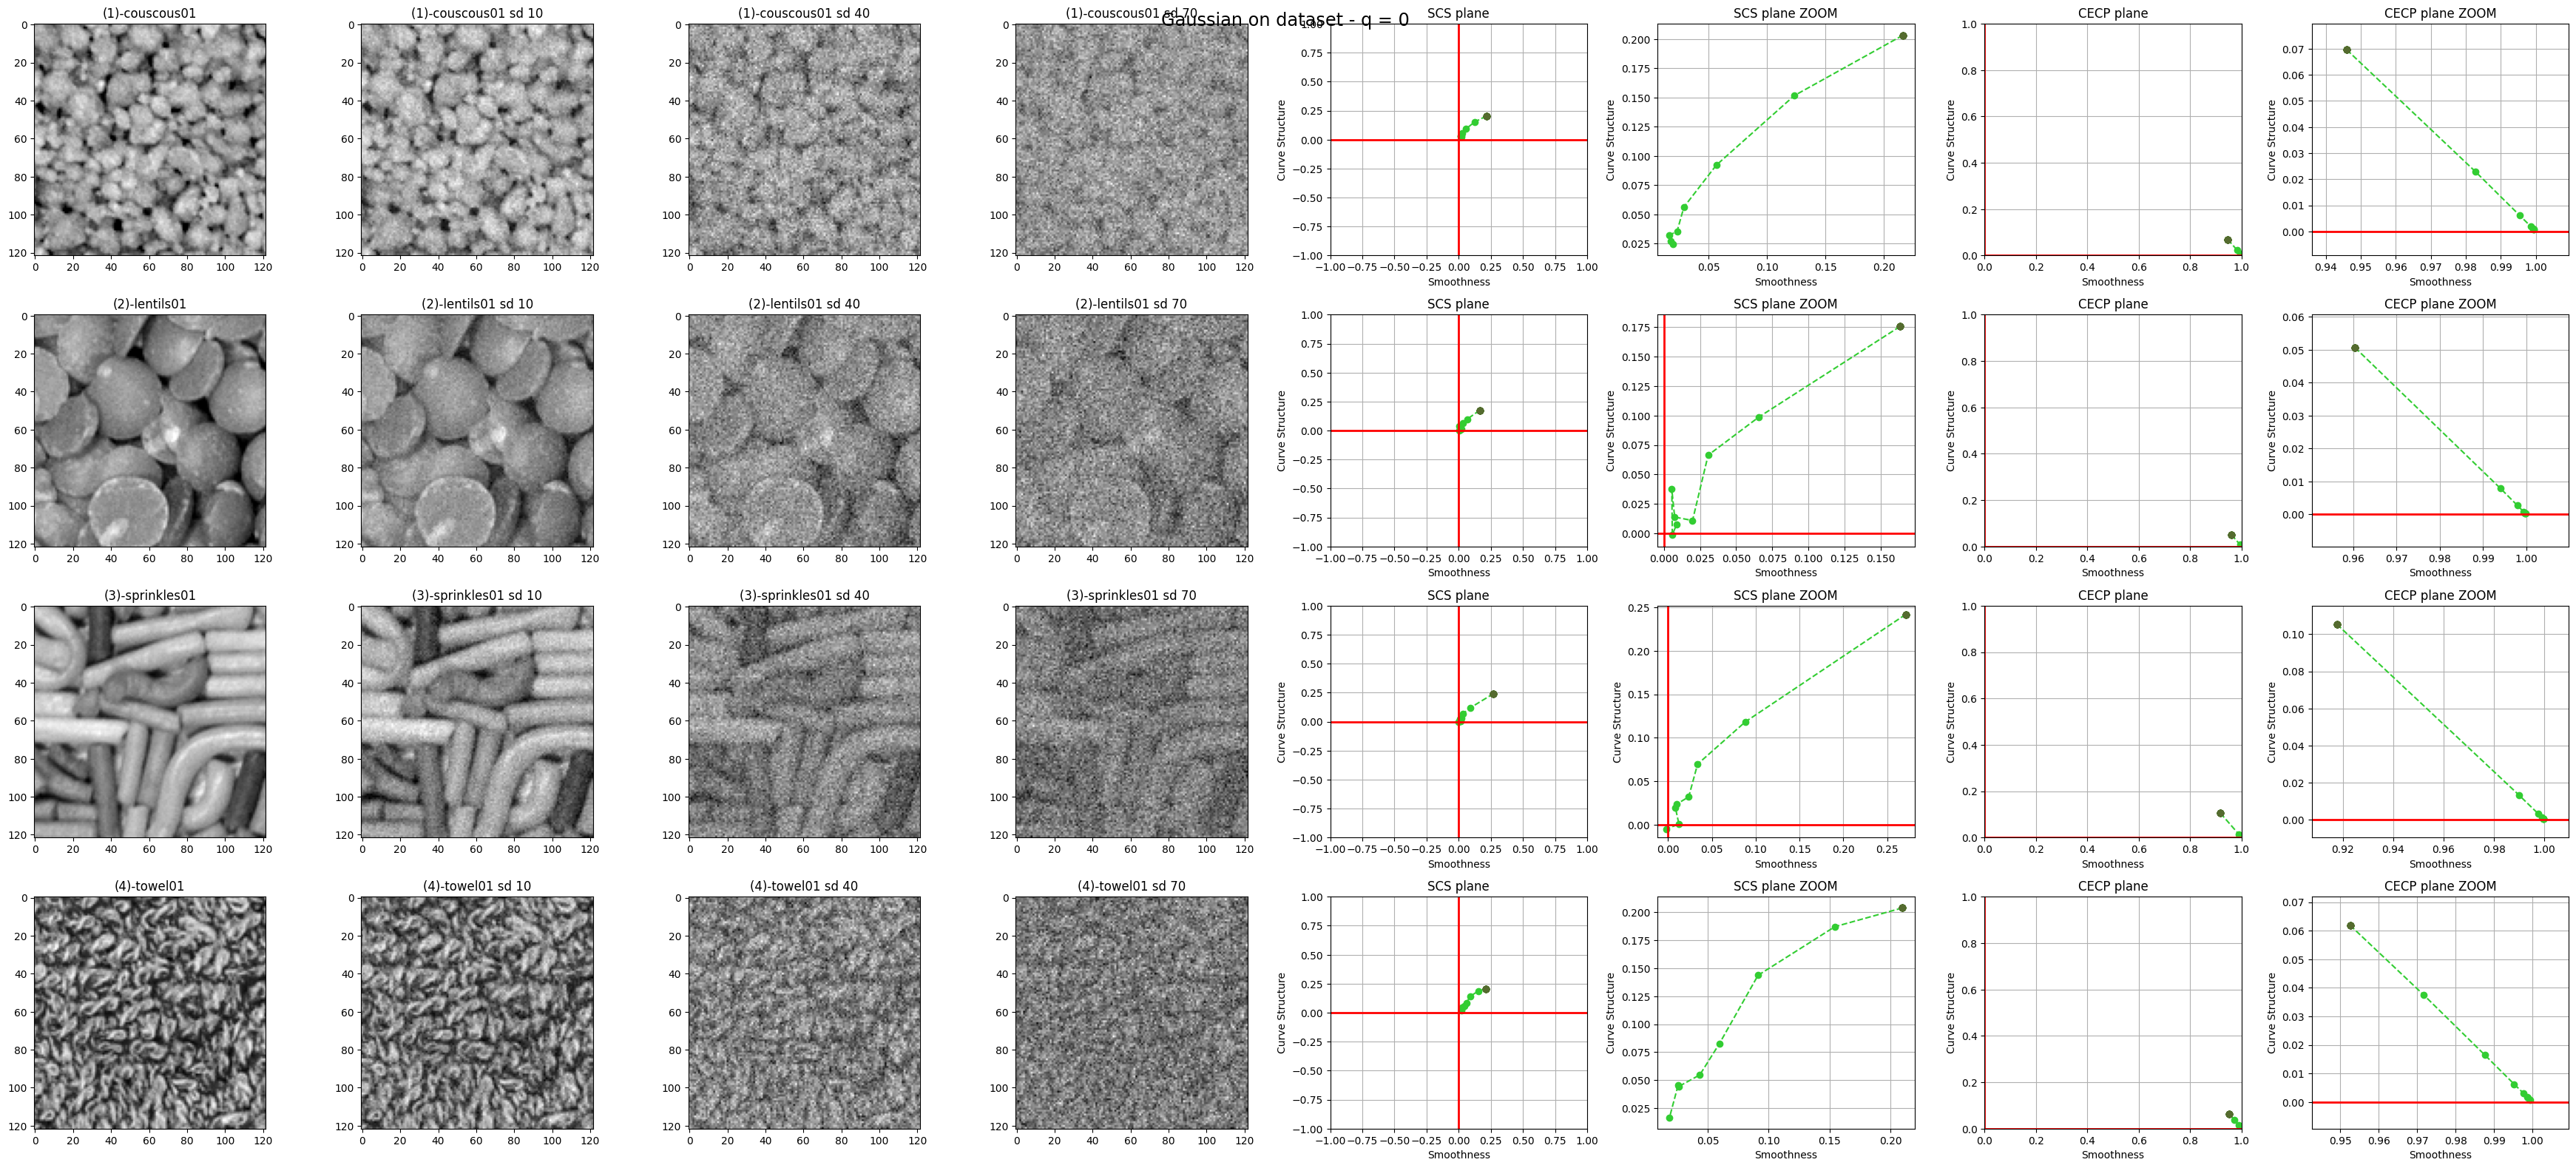

In [49]:
dict_color = {
    'original': 'darkolivegreen',
    'noise_sd': 'limegreen',
    'noise_mean': 'yellow'
}

amountOfImages = 25 # must be less or equal to 25
ncolsChosen = 8
chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)
chosen_filenames = [
    'couscous01-r000-s001.png',
    'towel01-r000-s001.png',
    'sprinkles01-r000-s001.png',
    'lentils01-r000-s001.png'
]
amountOfImages = len(chosen_filenames)
chosen_filenames.sort()
# nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
nrowsChosen = amountOfImages
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(35, 4* nrowsChosen))
# Flatten the axs array for easier indexing
# axs = axs.flatten()
images_path = f'data/Sintorn/hardware'
for i, imageName in enumerate(chosen_filenames):
    # read image
    gs_image = cv2.imread(f'{images_path}/{imageName}', cv2.IMREAD_GRAYSCALE)
    # pick a mean and sd
    mean_chosen = 50
    sd_values = dataset_data_q0['sd_value'].unique()[1::3]
    # original image
    axs[i][0].imshow(gs_image, cmap='gray')
    axs[i][0].set_title(f"({i+1})-{imageName.split('-')[0]}")
    for idx, sd_chosen in enumerate(sd_values):
        # noised image
        noised_image = gaussian_noise_gs(mean_chosen, sd_chosen, gs_image)
        # plot noised image
        axs[i][idx+1].imshow(noised_image, cmap='gray')
        axs[i][idx+1].set_title(f"({i+1})-{imageName.split('-')[0]} sd {sd_chosen}")

    # Filter DataFrame for the current imageName
    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    # plots the original plane and ZOOMED IN
    for index in range(4, 6):
        # get data varying sd and setting mean as 0
        df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == mean_chosen]
        axs[i][index].plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} Gaussian sd")
        # get data varying mean and setting sd as 0
        # df_noised_mean = df_data_filtered[df_data_filtered['sd_value'] == 0]
        # axs[i][index].plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=dict_color[f"noise_mean"], label=f"{imageName} Gaussian mean")        
        # Get the original data (no noise)
        df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == mean_chosen)]
        # plot it
        axs[i][index].plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=dict_color["original"], label=f"{imageName}")
            
        axs[i][index].set_xlabel('Smoothness')
        axs[i][index].set_ylabel('Curve Structure')
        axs[i][index].grid(True)
        axs[i][index].axhline(y=0, lw=2, color='r')
        axs[i][index].axvline(x=0, lw=2, color='r')
        if index == 4:
            axs[i][index].set_title('SCS plane')
            axs[i][index].set_xlim([-1, 1])
            axs[i][index].set_ylim([-1, 1])
        else:
            axs[i][index].set_title('SCS plane ZOOM')
            axs[i][index].set_xlim([np.min(df_noised_sd['Smoothness'])-0.01, np.max(df_noised_sd['Smoothness'])+0.01])
            axs[i][index].set_ylim([np.min(df_noised_sd['Curve structure'])-0.01, np.max(df_noised_sd['Curve structure'])+0.01])
    for index in range(6, 8):
        # get data varying sd and setting mean as 0
        df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == mean_chosen]
        axs[i][index].plot(df_noised_sd['Weighted Entropy Correct'], df_noised_sd['Weighted Complexity Correct'], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} Gaussian sd")
        # get data varying mean and setting sd as 0
        # df_noised_mean = df_data_filtered[df_data_filtered['sd_value'] == 0]
        # axs[i][index].plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=dict_color[f"noise_mean"], label=f"{imageName} Gaussian mean")        
        # Get the original data (no noise)
        df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == mean_chosen)]
        # plot it
        axs[i][index].plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=dict_color["original"], label=f"{imageName}")
            
        axs[i][index].set_xlabel('Smoothness')
        axs[i][index].set_ylabel('Curve Structure')
        axs[i][index].grid(True)
        axs[i][index].axhline(y=0, lw=2, color='r')
        axs[i][index].axvline(x=0, lw=2, color='r')
        if index == 6:
            axs[i][index].set_title('CECP plane')
            axs[i][index].set_xlim([0, 1])
            axs[i][index].set_ylim([0, 1])
        else:
            axs[i][index].set_title('CECP plane ZOOM')
            axs[i][index].set_xlim([np.min(df_noised_sd['Weighted Entropy Correct'])-0.01, np.max(df_noised_sd['Weighted Entropy Correct'])+0.01])
            axs[i][index].set_ylim([np.min(df_noised_sd['Weighted Complexity Correct'])-0.01, np.max(df_noised_sd['Weighted Complexity Correct'])+0.01])
            
# Adjust layout to prevent overlap
plt.tight_layout()
fig.suptitle(f"Gaussian on dataset - q = {q_value}", size='xx-large')
fig.subplots_adjust(top=0.97)
# Save
plt.savefig(f'results/noise_analysis/q0/planes/gaussian_dataset_comparing_SCSxCECP_q{q_value}_v2.png', bbox_inches='tight')
# Show the plot
plt.show()

Saving info

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_24580\3610001163.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} Gaussian sd")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_24580\3610001163.py:56: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} Gaussian sd")


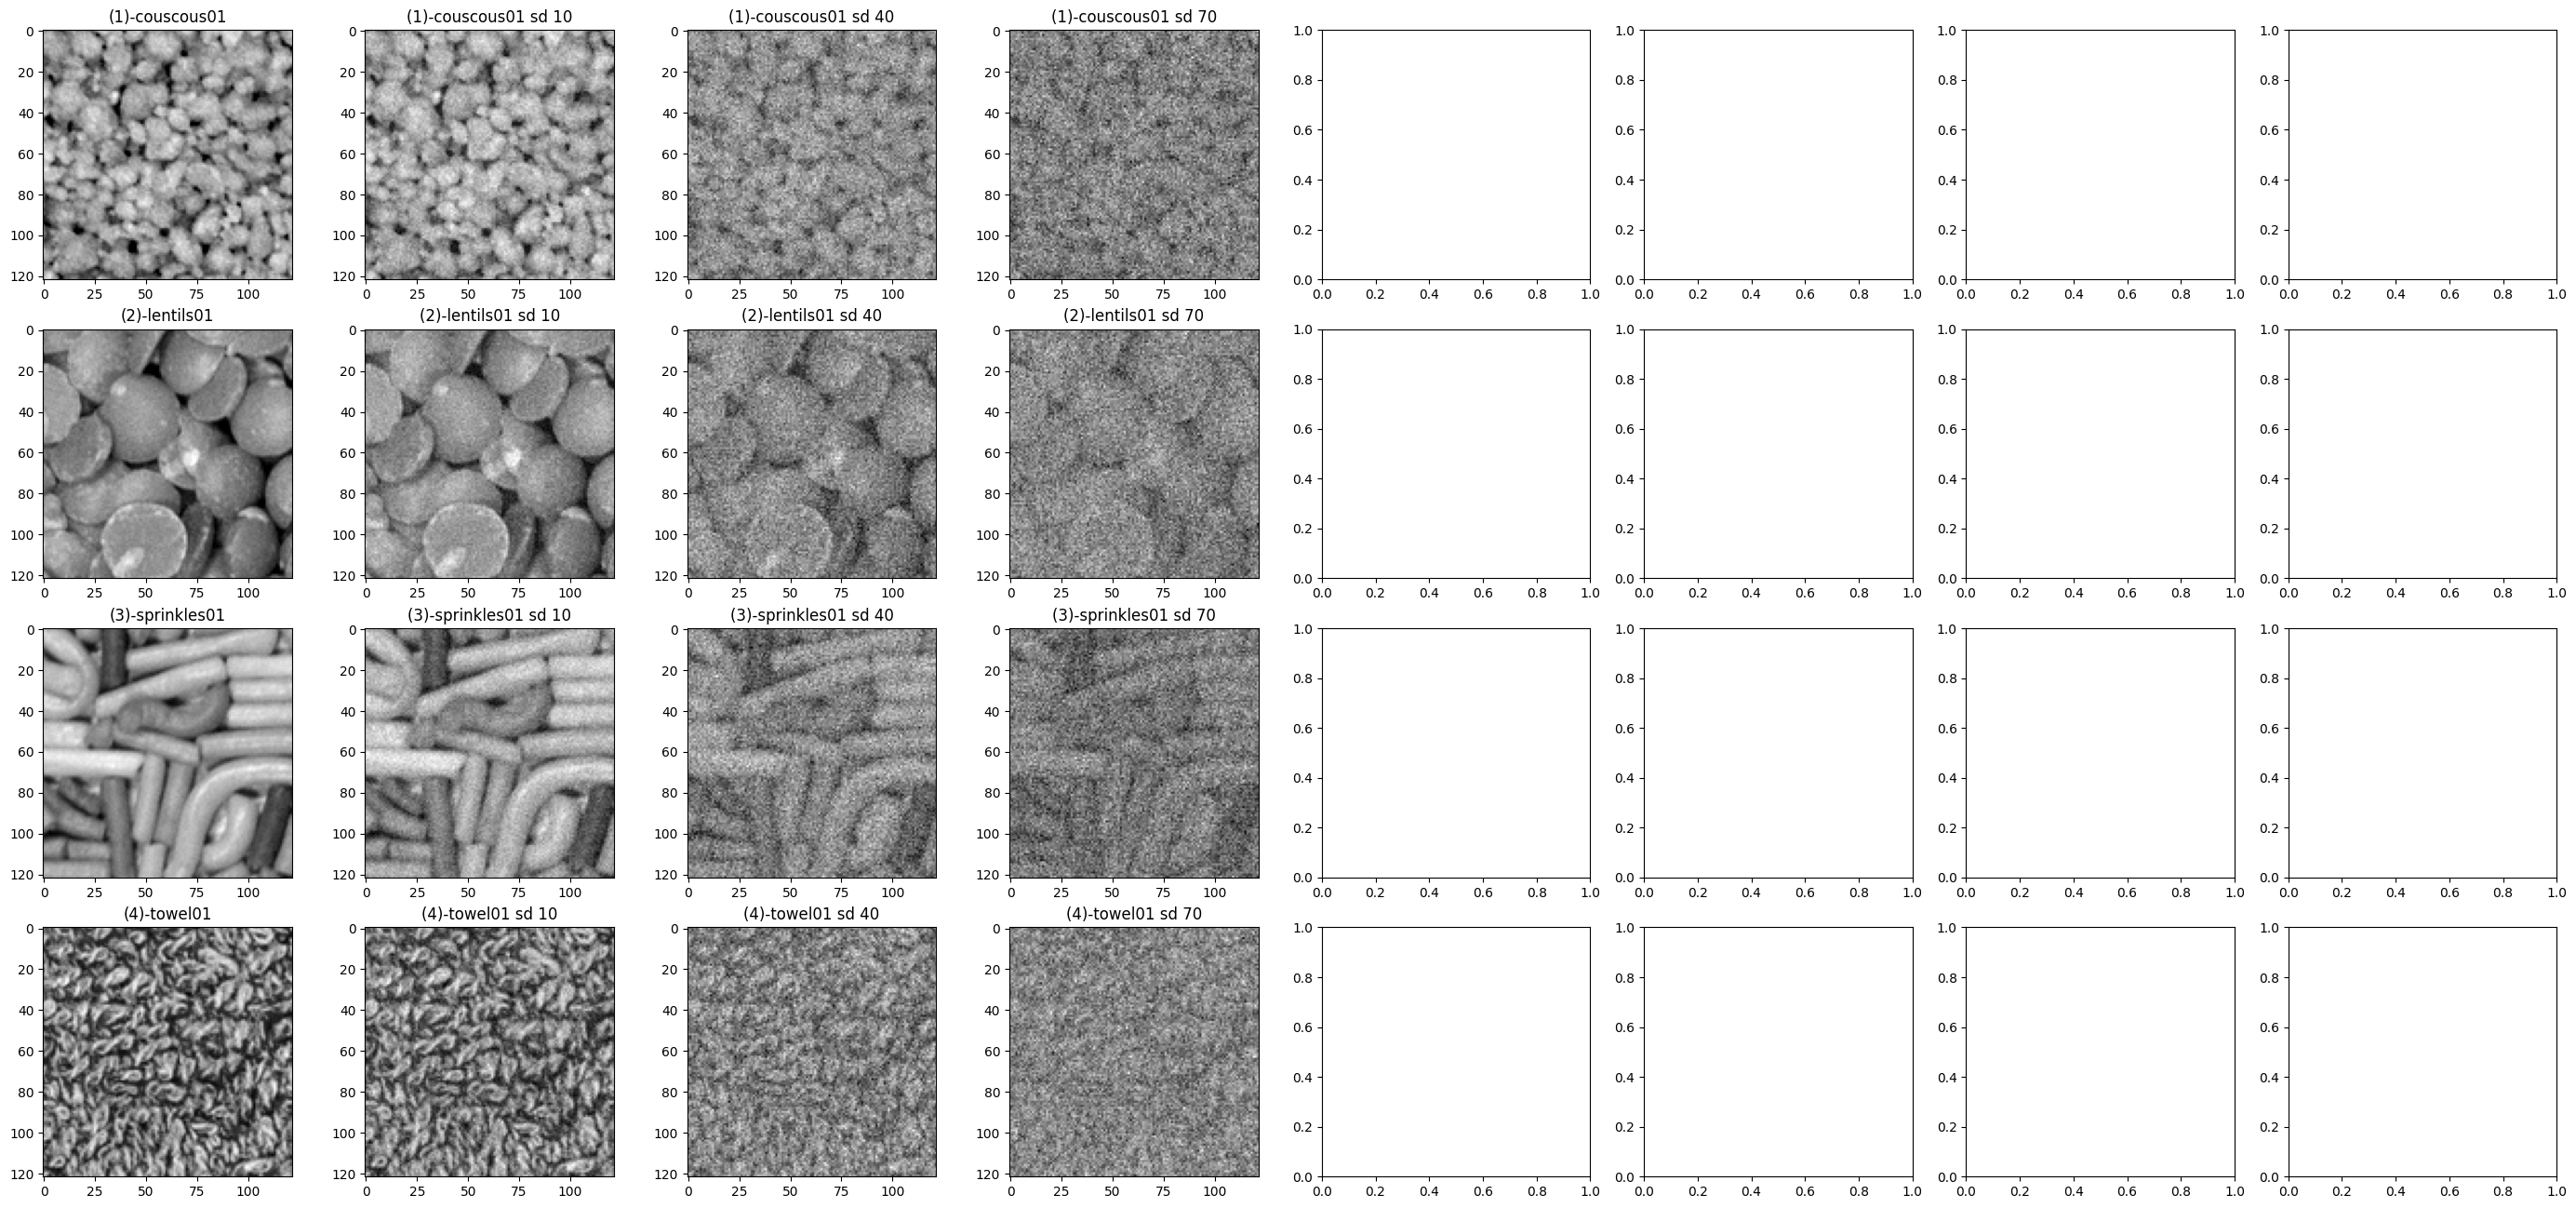

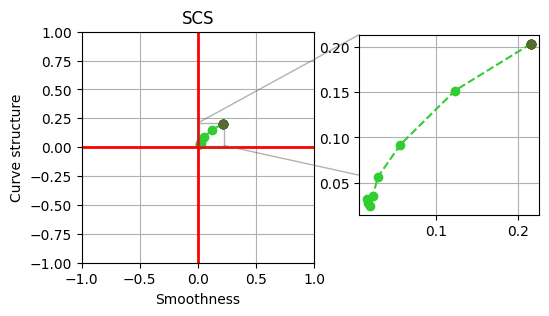

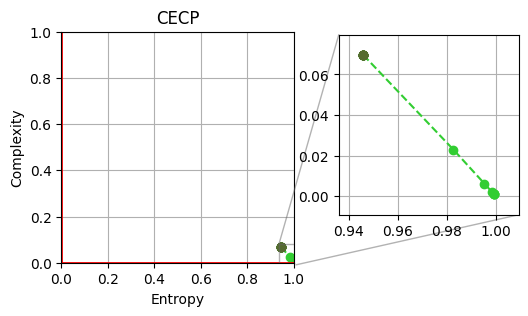

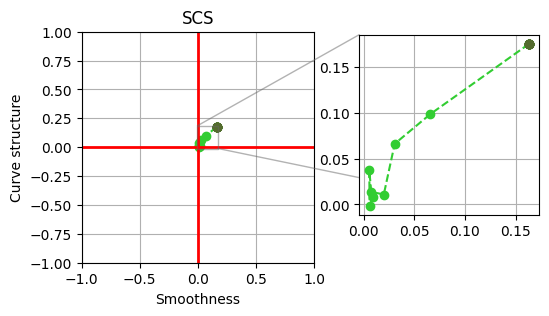

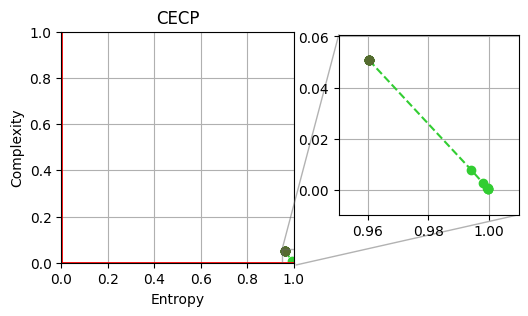

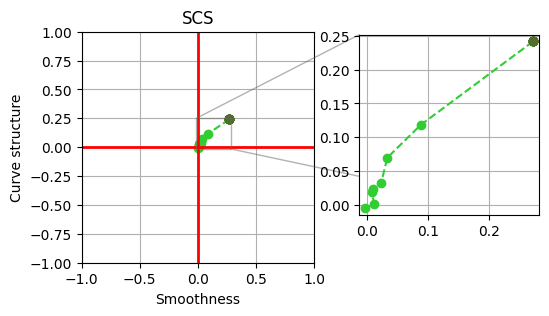

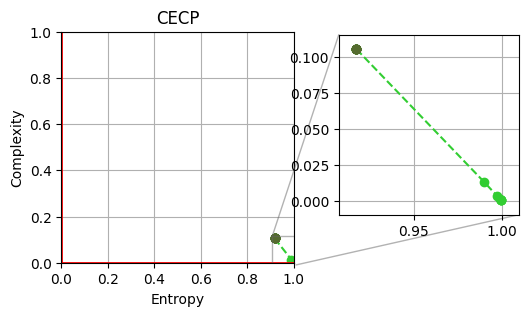

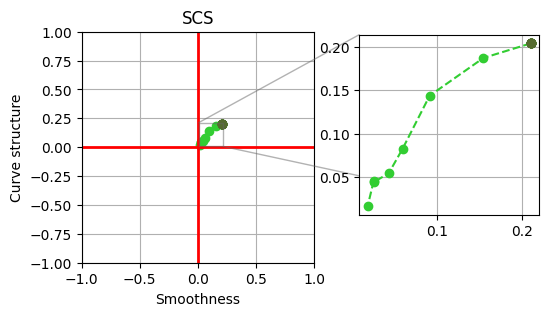

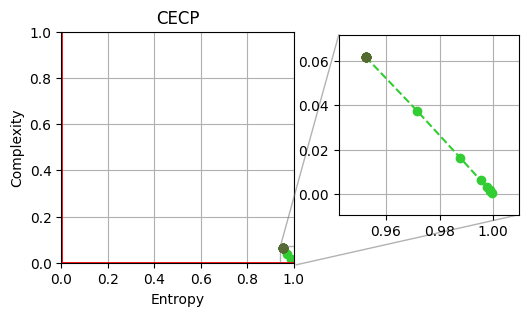

In [70]:
dict_color = {
    'original': 'darkolivegreen',
    'noise_sd': 'limegreen',
    'noise_mean': 'yellow'
}

amountOfImages = 25 # must be less or equal to 25
ncolsChosen = 8
chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)
chosen_filenames = [
    'couscous01-r000-s001.png',
    'towel01-r000-s001.png',
    'sprinkles01-r000-s001.png',
    'lentils01-r000-s001.png'
]
amountOfImages = len(chosen_filenames)
chosen_filenames.sort()
# nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
nrowsChosen = amountOfImages
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(35, 4* nrowsChosen))
# Flatten the axs array for easier indexing
# axs = axs.flatten()
images_path = f'data/Sintorn/hardware'
results_image_path = "results/noise_analysis/q0/gaussian/images"
for i, imageName in enumerate(chosen_filenames):
    # read image
    gs_image = cv2.imread(f'{images_path}/{imageName}', cv2.IMREAD_GRAYSCALE)
    im = Image.fromarray(gs_image)
    im = im.convert('RGB')
    im.save(f"{results_image_path}/{imageName.split('-')[0]}.png")
    # pick a mean and sd
    mean_chosen = 50
    sd_values = dataset_data_q0['sd_value'].unique()[1::3]
    # original image
    axs[i][0].imshow(gs_image, cmap='gray')
    axs[i][0].set_title(f"({i+1})-{imageName.split('-')[0]}")
    for idx, sd_chosen in enumerate(sd_values):
        # noised image
        noised_image = gaussian_noise_gs(mean_chosen, sd_chosen, gs_image)
        im = Image.fromarray(noised_image)
        im = im.convert('RGB')
        im.save(f"{results_image_path}/{imageName.split('-')[0]}-sd-{sd_chosen}.png")
        # plot noised image
        axs[i][idx+1].imshow(noised_image, cmap='gray')
        axs[i][idx+1].set_title(f"({i+1})-{imageName.split('-')[0]} sd {sd_chosen}")

    # Filter DataFrame for the current imageName
    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    for (x_label, y_label) in [('Smoothness', 'Curve structure'),('Weighted Entropy Correct', 'Weighted Complexity Correct')]:
        fig, ax_main =plt.subplots(figsize=(3, 3))
        axins = plt.axes([1.05, 0.27, 0.6, 0.6])

        # get data varying sd and setting mean as 0
        df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == mean_chosen]
        ax_main.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} Gaussian sd")
        axins.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} Gaussian sd")
        # Get the original data (no noise)
        df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == mean_chosen)]
        # plot it
        ax_main.plot(df_no_noise[x_label], df_no_noise[y_label], 'o', c=dict_color["original"], label=f"{imageName}")
        axins.plot(df_no_noise[x_label], df_no_noise[y_label], 'o', c=dict_color["original"], label=f"{imageName}")

        
        x1, x2 = np.min(df_noised_sd[x_label])-0.01, np.max(df_noised_sd[x_label])+0.01
        y1, y2 = np.min(df_noised_sd[y_label])-0.01, np.max(df_noised_sd[y_label])+0.01
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.grid(True)
        ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
                
        ax_main.grid(True)
        ax_main.axhline(y=0, lw=2, color='r')
        ax_main.axvline(x=0, lw=2, color='r')

        if x_label == 'Smoothness':
            ax_main.set_xlabel(x_label)
            ax_main.set_ylabel(y_label)
            ax_main.set_title('SCS')
            ax_main.set_xlim([-1, 1])
            ax_main.set_ylim([-1, 1])
            plt.savefig(f'{results_image_path}/planes/{imageName.split('-')[0]}-scs.png', bbox_inches='tight')
        else:
            ax_main.set_xlabel('Entropy')
            ax_main.set_ylabel('Complexity')
            ax_main.set_title('CECP')
            ax_main.set_xlim([0, 1])
            ax_main.set_ylim([0, 1])
            plt.savefig(f'{results_image_path}/planes/{imageName.split('-')[0]}-cecp.png', bbox_inches='tight')


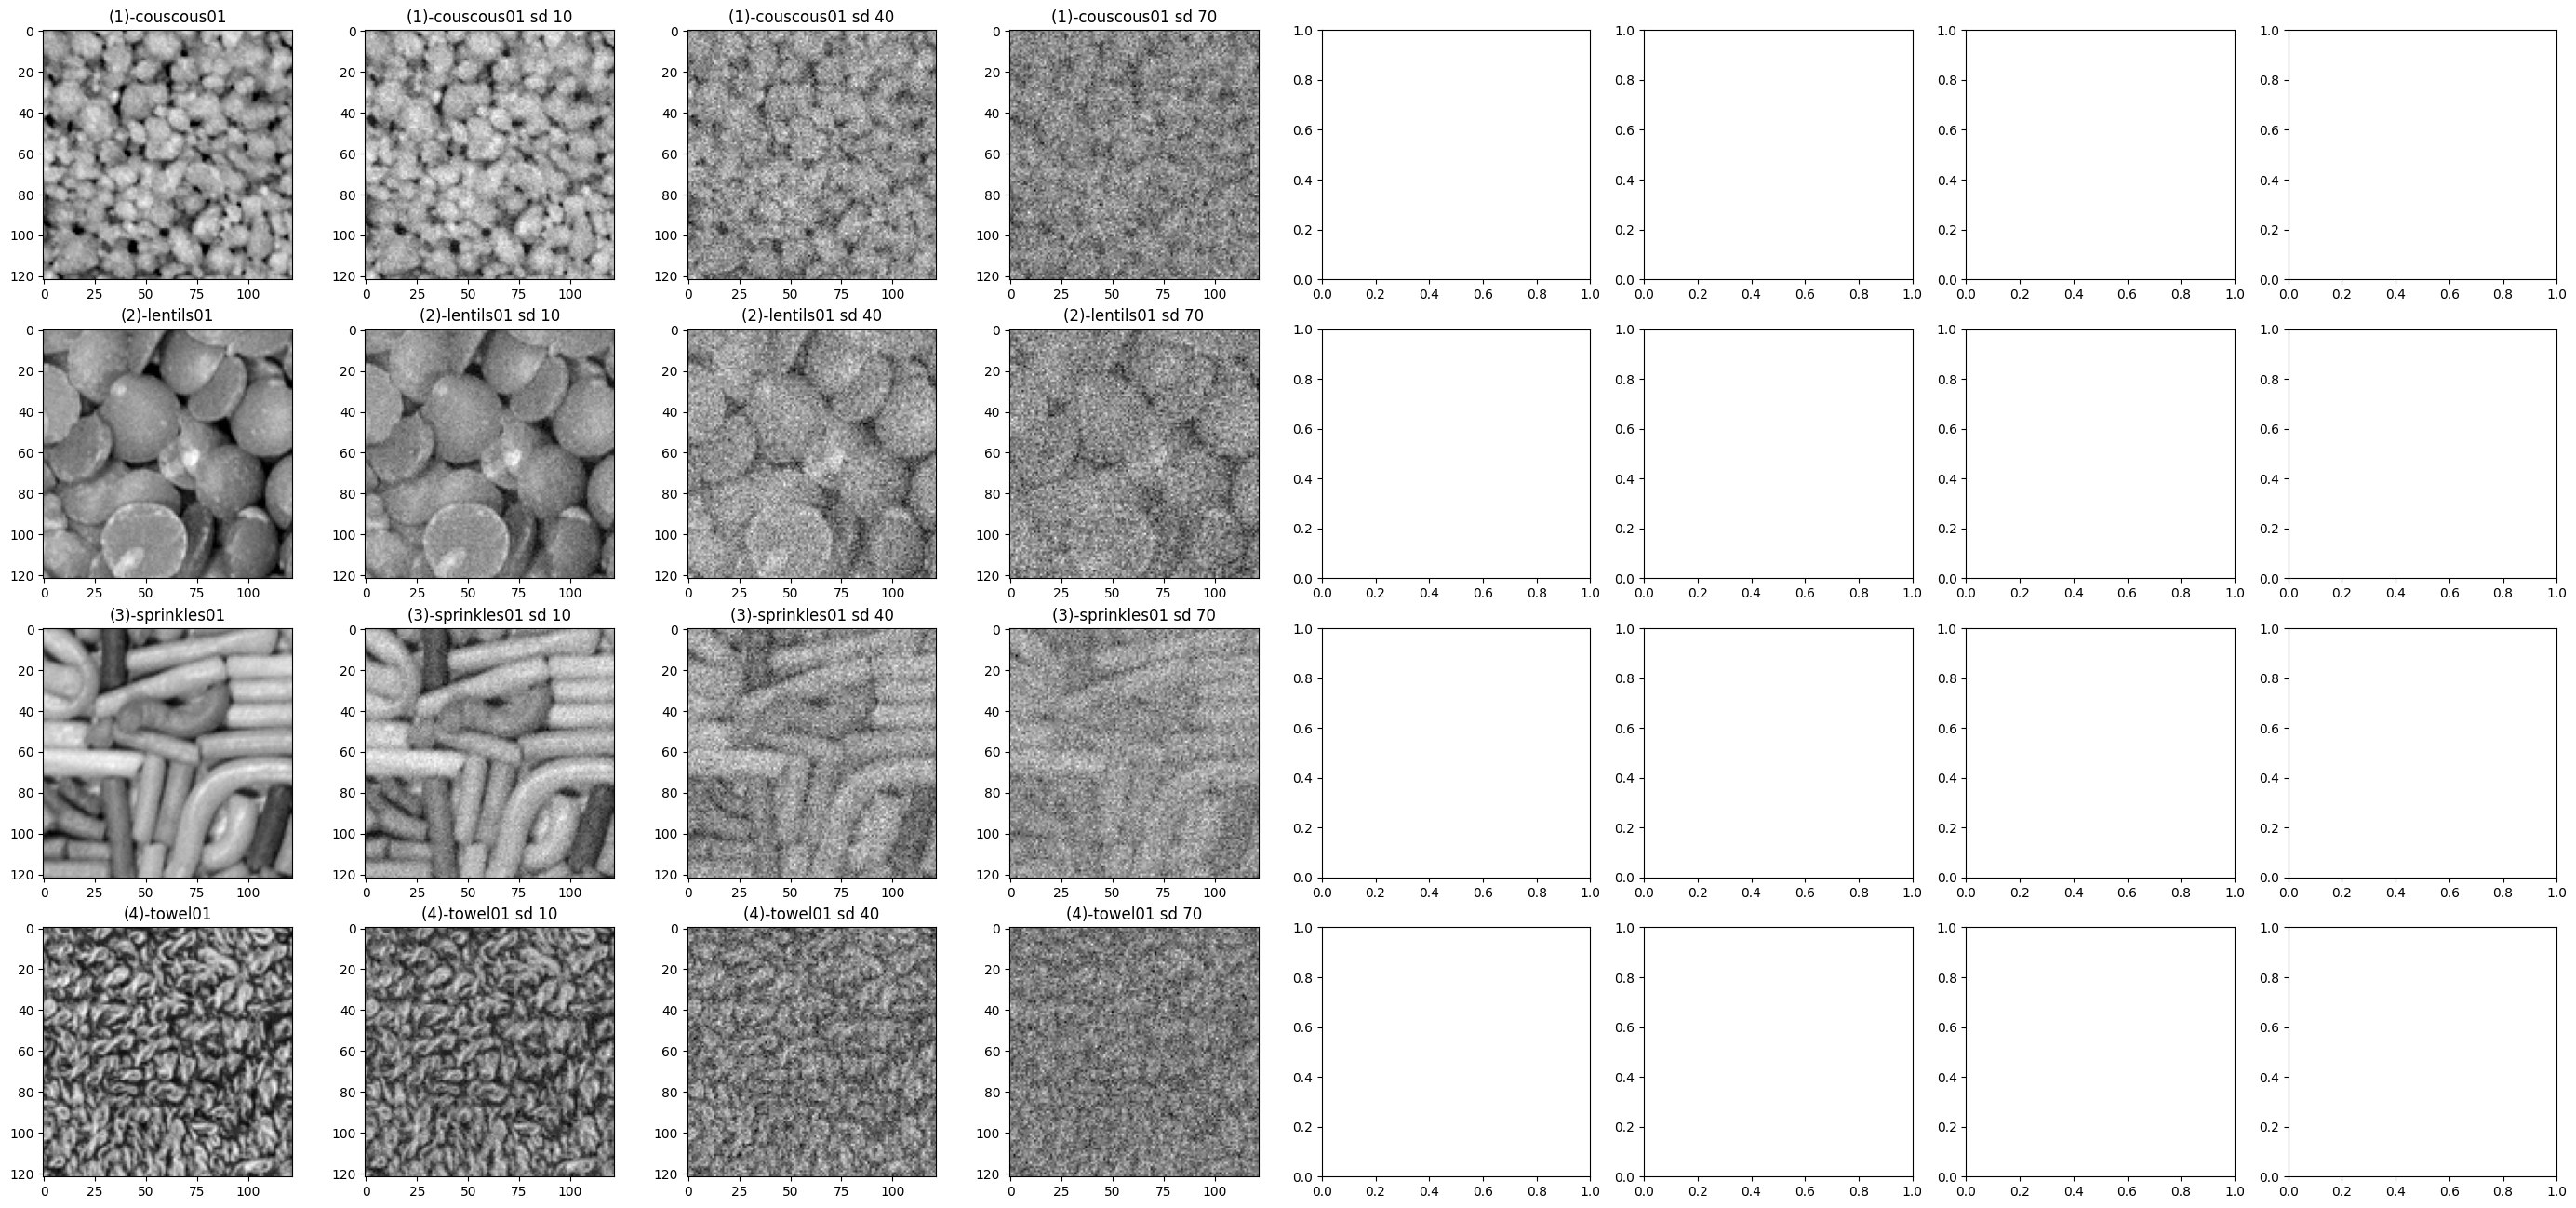

In [77]:
class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

dict_color = {
    'original': 'darkolivegreen',
    'noise_sd': 'limegreen',
    'noise_mean': 'yellow'
}

amountOfImages = 25 # must be less or equal to 25
ncolsChosen = 8
chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)
chosen_filenames = [
    'couscous01-r000-s001.png',
    'towel01-r000-s001.png',
    'sprinkles01-r000-s001.png',
    'lentils01-r000-s001.png'
]
amountOfImages = len(chosen_filenames)
chosen_filenames.sort()
# nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
nrowsChosen = amountOfImages
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(35, 4* nrowsChosen))
# Flatten the axs array for easier indexing
# axs = axs.flatten()
images_path = f'data/Sintorn/hardware'
results_image_path = "results/noise_analysis/q0/gaussian/images"
for i, imageName in enumerate(chosen_filenames):
    imageTitle = imageName.split('-')[0]
    # read image
    gs_image = cv2.imread(f'{images_path}/{imageName}', cv2.IMREAD_GRAYSCALE)
    im = Image.fromarray(gs_image)
    im = im.convert('RGB')
    im.save(f"{results_image_path}/{imageName.split('-')[0]}.png")
    # pick a mean and sd
    mean_chosen = 50
    sd_values = dataset_data_q0['sd_value'].unique()[1::3]
    # original image
    axs[i][0].imshow(gs_image, cmap='gray')
    axs[i][0].set_title(f"({i+1})-{imageName.split('-')[0]}")
    for idx, sd_chosen in enumerate(sd_values):
        # noised image
        noised_image = gaussian_noise_gs(mean_chosen, sd_chosen, gs_image)
        im = Image.fromarray(noised_image)
        im = im.convert('RGB')
        im.save(f"{results_image_path}/{imageName.split('-')[0]}-sd-{sd_chosen}.png")
        # plot noised image
        axs[i][idx+1].imshow(noised_image, cmap='gray')
        axs[i][idx+1].set_title(f"({i+1})-{imageName.split('-')[0]} sd {sd_chosen}")

    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    
    for (x_label, y_label) in [('Smoothness', 'Curve structure'), ('Weighted Entropy Correct', 'Weighted Complexity Correct')]:
        fig, ax_main = plt.subplots(figsize=(3, 3))
        axins = plt.axes([1.05, 0.27, 0.6, 0.6])

        # Process noise_sd data with gradient
        df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == mean_chosen]
        df_noised_sd_sorted = df_noised_sd.sort_values('sd_value')
        
        if len(df_noised_sd_sorted) >= 2:
            x = df_noised_sd_sorted[x_label].values
            y = df_noised_sd_sorted[y_label].values
            sd = df_noised_sd_sorted['sd_value'].values
            
            # Create gradient line collection
            points = np.array([x, y]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            
            cmap = mcolors.LinearSegmentedColormap.from_list(
                "noise_gradient", [dict_color['original'], dict_color['noise_sd']]
            )
            norm = plt.Normalize(vmin=sd.min(), vmax=sd.max())
            
            for ax in [ax_main, axins]:
                lc = LineCollection(segments, cmap=cmap, norm=norm, linestyle='--', linewidth=1)
                lc.set_array(sd)
                ax.add_collection(lc)
            
            # Gradient scatter points
            colors = cmap(norm(sd))
            ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o')
            axins.scatter(x, y, c=colors, edgecolors='none', marker='o')

        # Original data point
        df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == mean_chosen)]
        ax_main.scatter(df_no_noise[x_label], df_no_noise[y_label], 
                       c=dict_color['original'], edgecolors='none', marker='o', s=50)
        axins.scatter(df_no_noise[x_label], df_no_noise[y_label], 
                     c=dict_color['original'], edgecolors='none', marker='o', s=50)

        # Create legend
        gradient_handle = GradientLegendHandle(dict_color['original'], dict_color['noise_sd'])
        ax_main.legend(
            [gradient_handle, plt.Line2D([], [], color=dict_color['original'], marker='o', linestyle='None')],
            [f"{imageTitle} gaussian", f"{imageTitle} (no noise)"],
            handler_map={GradientLegendHandle: HandlerGradientLines()},
            loc='best',
            framealpha=1,
            fontsize=8
        )

        x1, x2 = np.min(df_noised_sd[x_label])-0.01, np.max(df_noised_sd[x_label])+0.01
        y1, y2 = np.min(df_noised_sd[y_label])-0.01, np.max(df_noised_sd[y_label])+0.01
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.grid(True)
                
        ax_main.grid(True)
        ax_main.axhline(y=0, lw=2, color='gray')
        ax_main.axvline(x=0, lw=2, color='gray')
        axins.axhline(y=0, lw=2, color='gray')
        axins.axvline(x=0, lw=2, color='gray')
        # Add these lines for proper zoom box visualization
        axins.set_aspect('equal')
        ax_main.set_aspect('equal')
        ax_main.indicate_inset_zoom(axins, edgecolor='0.4')
        
        ax_main.set_xlim([-0.1, 1])
        ax_main.set_ylim([-0.1, 1])
        

        if x_label == 'Smoothness':
            ax_main.set_title('SCS', fontsize=14, fontweight='bold')
            ax_main.set_xlabel('Smoothness', fontsize=12)
            ax_main.set_ylabel('Curve Structure', fontsize=12)
            plt.savefig(f'{results_image_path}/planes/{imageName.split('-')[0]}-scs.png', bbox_inches='tight')
        else:
            ax_main.set_title('CECP', fontsize=14, fontweight='bold')
            ax_main.set_xlabel('Entropy', fontsize=12)
            ax_main.set_ylabel('Complexity', fontsize=12)
            plt.savefig(f'{results_image_path}/planes/{imageName.split('-')[0]}-cecp.png', bbox_inches='tight')
            
        plt.close(fig)

## SKIMAGE IMAGES

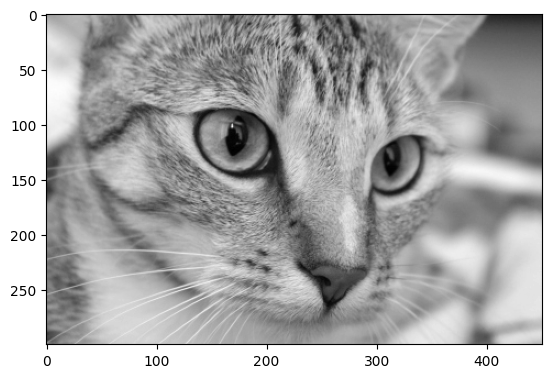

In [3]:
astronaut_image = data.cat()
astronaut_image = rgb2gray(astronaut_image)
plt.imshow(astronaut_image, cmap='gray')

In [4]:
skimage_images = {
    'data.astronaut': rgb2gray(data.astronaut())* 255,
    'data.cat': rgb2gray(data.cat())*255,
    'data.coins': data.coins()
}
for idx,skimage_name in enumerate(skimage_images):
    # reads the image
    gs_image = skimage_images[skimage_name]
    print(skimage_name, gs_image.shape)

data.astronaut (512, 512)
data.cat (300, 451)
data.coins (303, 384)


astronaut 1/3
<class 'numpy.ndarray'>
cat 2/3
<class 'numpy.ndarray'>
coins 3/3
<class 'numpy.ndarray'>


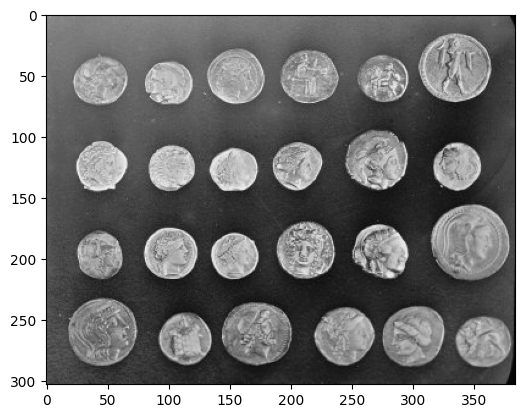

In [117]:
skimage_images = {
    'data.astronaut': rgb2gray(data.astronaut())* 255,
    'data.cat': rgb2gray(data.cat())*255,
    'data.coins': data.coins()
}
results_image_path = "results/noise_analysis/q0/gaussian/images"
for idx,skimage_name in enumerate(skimage_images):
    # reads the image
    gs_image = skimage_images[skimage_name]
    image_title = skimage_name.split('.')[1]
    print(image_title, f"{idx+1}/{len(skimage_images)}")
    plt.imshow(gs_image, cmap='gray')
    print(type(gs_image))
    im = Image.fromarray(gs_image)
    im = im.convert('RGB')
    im.save(f"{results_image_path}/{image_title}.png")

In [12]:
skimage_data = pd.read_csv(f"results/noise_analysis/gaussian/gaussian_analysis_skimage_noisegen.csv")
skimage_data

q  Smoothness  Curve structure  Weighted Entropy Correct  \
0   0    0.226687         0.149256                  0.942420   
1   0    0.030004         0.049341                  0.998623   
2   0    0.014751         0.024713                  0.999660   
3   0    0.008520         0.015020                  0.999858   
4   0    0.006318         0.012044                  0.999920   
.. ..         ...              ...                       ...   
58  0    0.000801        -0.001314                  0.999964   
59  0    0.000550         0.000147                  0.999981   
60  0   -0.002173         0.002421                  0.999975   
61  0    0.000810         0.000925                  0.999981   
62  0    0.001735         0.001297                  0.999966   

    Weighted Complexity Correct     prob0     prob1     prob2      image_name  \
0                      0.066415  0.560020  0.294618  0.145362  data.astronaut   
1                      0.001812  0.363337  0.343002  0.293661  data.astronaut   
2                      0.000447  0.348084  0.338314  0.313602  data.astronaut   
3                      0.000187  0.341853  0.336583  0.321564  data.astronaut   
4                      0.000105  0.339651  0.336197  0.324152  data.astronaut   
..                          ...       ...       ...       ...             ...   
58                     0.000047  0.334134  0.332276  0.333590      data.coins   
59                     0.000025  0.333884  0.333132  0.332985      data.coins   
60                     0.000033  0.331160  0.335630  0.333209      data.coins   
61                     0.000025  0.334143  0.333391  0.332466      data.coins   
62                     0.000044  0.335068  0.333114  0.331817      data.coins   

    mean_value  sd_value  
0            0      0.00  
1            0      0.05  
2            0      0.10  
3            0      0.15  
4            0      0.20  
..         ...       ...  
58           0      0.80  
59           0      0.85  
60           0      0.90  
61           0      0.95  
62           0      1.00  

[63 rows x 11 columns]

In [15]:
skimage_data[['image_name', 'sd_value', 'Smoothness', 'Curve structure', 'Weighted Entropy Correct', 'Weighted Complexity Correct']].head(21)


image_name  sd_value  Smoothness  Curve structure  \
0   data.astronaut      0.00    0.226687         0.149256   
1   data.astronaut      0.05    0.030004         0.049341   
2   data.astronaut      0.10    0.014751         0.024713   
3   data.astronaut      0.15    0.008520         0.015020   
4   data.astronaut      0.20    0.006318         0.012044   
5   data.astronaut      0.25    0.004663         0.007242   
6   data.astronaut      0.30    0.002216         0.003148   
7   data.astronaut      0.35    0.001960         0.003435   
8   data.astronaut      0.40    0.000416         0.000896   
9   data.astronaut      0.45    0.002656         0.001834   
10  data.astronaut      0.50    0.002492         0.002665   
11  data.astronaut      0.55    0.000811         0.000142   
12  data.astronaut      0.60    0.001377         0.003451   
13  data.astronaut      0.65    0.000880         0.002715   
14  data.astronaut      0.70   -0.000266        -0.001195   
15  data.astronaut      0.75    0.002028         0.001574   
16  data.astronaut      0.80   -0.000074         0.004649   
17  data.astronaut      0.85   -0.000388        -0.000222   
18  data.astronaut      0.90   -0.001028         0.002018   
19  data.astronaut      0.95   -0.000059         0.000046   
20  data.astronaut      1.00   -0.000009         0.002118   

    Weighted Entropy Correct  Weighted Complexity Correct  
0                   0.942420                     0.066415  
1                   0.998623                     0.001812  
2                   0.999660                     0.000447  
3                   0.999858                     0.000187  
4                   0.999920                     0.000105  
5                   0.999955                     0.000059  
6                   0.999984                     0.000021  
7                   0.999982                     0.000024  
8                   0.999992                     0.000010  
9                   0.999971                     0.000038  
10                  0.999976                     0.000031  
11                  0.999981                     0.000025  
12                  0.999988                     0.000016  
13                  0.999980                     0.000026  
14                  0.999991                     0.000012  
15                  0.999991                     0.000012  
16                  0.999986                     0.000019  
17                  0.999989                     0.000014  
18                  0.999984                     0.000021  
19                  0.999980                     0.000026  
20                  0.999992                     0.000010

In [17]:
q_value = 0
skimage_data = skimage_data[(skimage_data['q'] == q_value)]

In [18]:
skimage_data['mean_value'].unique()

array([0], dtype=int64)

In [19]:
skimage_data['sd_value'].unique()

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [20]:
skimage_data['image_name'].unique()

array(['data.astronaut', 'data.cat', 'data.coins'], dtype=object)

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_12372\1481538405.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} gaussian")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_12372\1481538405.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} gaussian")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_12372\1481538405.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layo

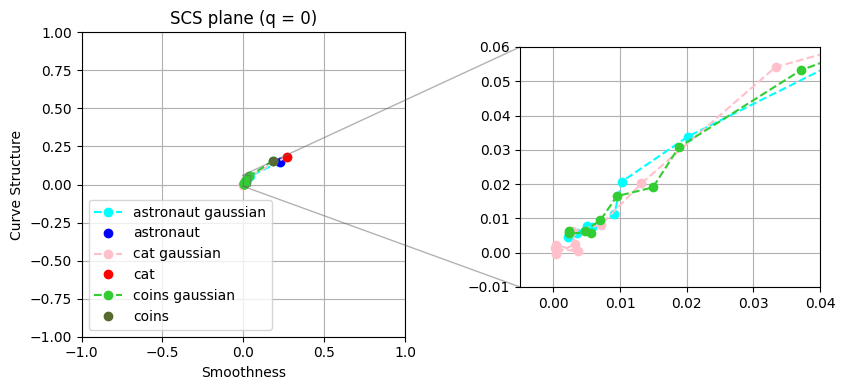

In [14]:
figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise_sd': 'cyan',
    'data.astronaut_noise_mean': 'darkviolet',
    'data.cat': 'red',
    'data.cat_noise_sd': 'pink',
    'data.cat_noise_mean': 'sienna',
    'data.coins': 'darkolivegreen',
    'data.coins_noise_sd': 'limegreen',
    'data.coins_noise_mean': 'yellow'
}
unique_skimage_images = skimage_data['image_name'].unique()

fig, ax_main =plt.subplots(figsize=(5, 4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_skimage_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    # get data varying sd and setting mean as 0
    df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0]
    ax_main.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} gaussian")
    axins.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} gaussian")
    # get data varying mean and setting sd as 0
    # df_noised_mean = df_data_filtered[df_data_filtered['sd_value'] == 0]
    # ax_main.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    # axins.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == 0)]
    # plot it
    ax_main.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
    axins.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])

# Set title and labels for the subplot
ax_main.set_title(f'SCS plane (q = {q_value})')
ax_main.set_xlabel('Smoothness')
ax_main.set_ylabel('Curve Structure')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = -0.005, 0.04, -0.01, 0.06
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
# plt.savefig(f'results/noise_analysis/q0/gaussian/gaussian_skimage_scs_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4624\1609434116.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


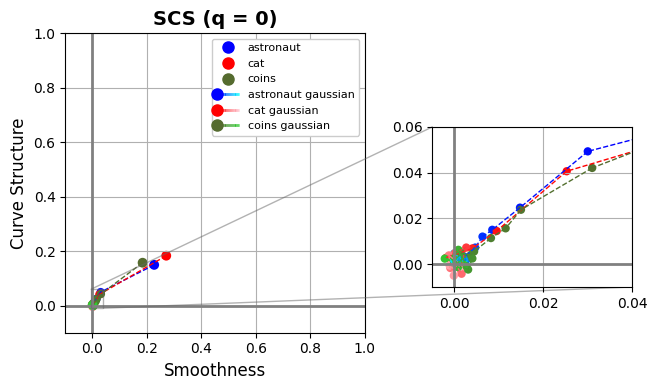

In [21]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise_sd': 'cyan',
    'data.astronaut_noise_mean': 'darkviolet',
    'data.cat': 'red',
    'data.cat_noise_sd': 'pink',
    'data.cat_noise_mean': 'sienna',
    'data.coins': 'darkolivegreen',
    'data.coins_noise_sd': 'limegreen',
    'data.coins_noise_mean': 'yellow'
}

unique_skimage_images = skimage_data['image_name'].unique()

fig, ax_main = plt.subplots(figsize=(5,4))
axins = plt.axes([0.8, 0.27, 0.4, 0.4])
gradient_handles = []
original_handles = []

for i, imageName in enumerate(unique_skimage_images):
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    base_name = imageName.split('.')[1]
    
    # Process noise_sd data with gradient
    df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0].sort_values('sd_value')
    
    if len(df_noised_sd) >= 2:
        x = df_noised_sd['Smoothness'].values
        y = df_noised_sd['Curve structure'].values
        sd = df_noised_sd['sd_value'].values
        
        # Create gradient line collection
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        original_color = figname_to_color[imageName]
        noise_color = figname_to_color[f"{imageName}_noise_sd"]
        cmap = mcolors.LinearSegmentedColormap.from_list(f"{base_name}_cmap", [original_color, noise_color])
        norm = plt.Normalize(vmin=sd.min(), vmax=sd.max())
        
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, linestyle='--', linewidth=1)
            lc.set_array(sd)
            ax.add_collection(lc)
        
        # Gradient scatter points
        colors = cmap(norm(sd))
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o')
        axins.scatter(x, y, c=colors, edgecolors='none', marker='o')
        
        gradient_handles.append(GradientLegendHandle(original_color, noise_color))
    
    # Original data point
    df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == 0)]
    original_color = figname_to_color[imageName]
    ax_main.scatter(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 
                   c=original_color, edgecolors='none', marker='o', s=50)
    axins.scatter(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 
                 c=original_color, edgecolors='none', marker='o', s=50)
    
    original_handles.append(
        plt.Line2D([], [], color=original_color, marker='o', linestyle='None',
                  label=f"{base_name}", markersize=8)
    )

# Create combined legend
all_handles = original_handles + gradient_handles
all_labels = [h.get_label() for h in original_handles] + \
            [f"{imageName.split('.')[1]} gaussian" for imageName in unique_skimage_images]

ax_main.legend(
    all_handles,
    all_labels,
    handler_map={GradientLegendHandle: HandlerGradientLines()},
    loc='best',
    framealpha=1,
    fontsize=8
)

# Configure axes
ax_main.set_title(f'SCS (q = {q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Smoothness', fontsize=12)
ax_main.set_ylabel('Curve Structure', fontsize=12)
ax_main.set_xlim([-0.1, 1])
ax_main.set_ylim([-0.1, 1])
ax_main.set_aspect('equal')
ax_main.grid(True)
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')

# Inset configuration
x1, x2, y1, y2 = -0.005, 0.04, -0.01, 0.06
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_aspect('auto')
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

plt.tight_layout()
plt.savefig(f'results/noise_analysis/q0/gaussian/gaussian_skimage_scs_q{q_value}_noisegen.png', bbox_inches='tight')
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_12372\3770536499.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_sd['Weighted Entropy Correct'], df_noised_sd['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} gaussian")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_12372\3770536499.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_sd['Weighted Entropy Correct'], df_noised_sd['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} gaussian")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_12372\3770536499.py:53: UserWarning: This figure includes Axes that are not compatible with tight_lay

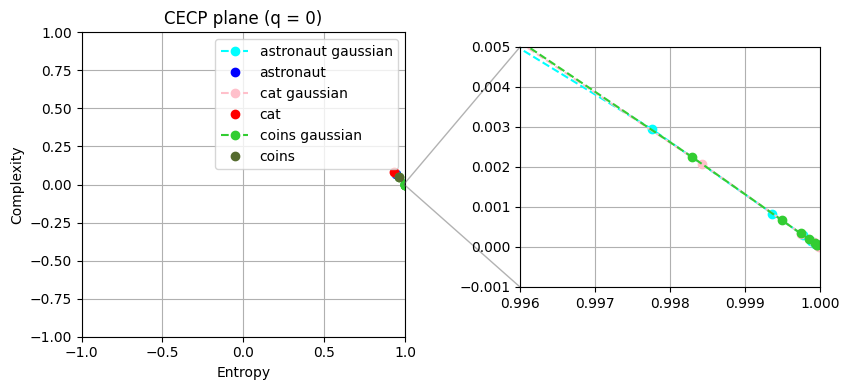

In [17]:
figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise_sd': 'cyan',
    'data.astronaut_noise_mean': 'darkviolet',
    'data.cat': 'red',
    'data.cat_noise_sd': 'pink',
    'data.cat_noise_mean': 'sienna',
    'data.coins': 'darkolivegreen',
    'data.coins_noise_sd': 'limegreen',
    'data.coins_noise_mean': 'yellow'
}
unique_skimage_images = skimage_data['image_name'].unique()

fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_skimage_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    # get data varying sd and setting mean as 0
    df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0]
    ax_main.plot(df_noised_sd['Weighted Entropy Correct'], df_noised_sd['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} gaussian")
    axins.plot(df_noised_sd['Weighted Entropy Correct'], df_noised_sd['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} gaussian")
    # get data varying mean and setting sd as 0
    # df_noised_mean = df_data_filtered[df_data_filtered['sd_value'] == 0]
    # ax_main.plot(df_noised_mean['Weighted Entropy Correct'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    # axins.plot(df_noised_mean['Weighted Entropy Correct'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == 0)]
    # plot it
    ax_main.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
    axins.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])

# Set title and labels for the subplot
ax_main.set_title(f'CECP plane (q = {q_value})')
ax_main.set_xlabel('Entropy')
ax_main.set_ylabel('Complexity')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = 0.996, 1, -0.001, 0.005
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
# plt.savefig(f'results/noise_analysis/q0/gaussian/gaussian_skimage_cecp_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4624\1222244634.py:140: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


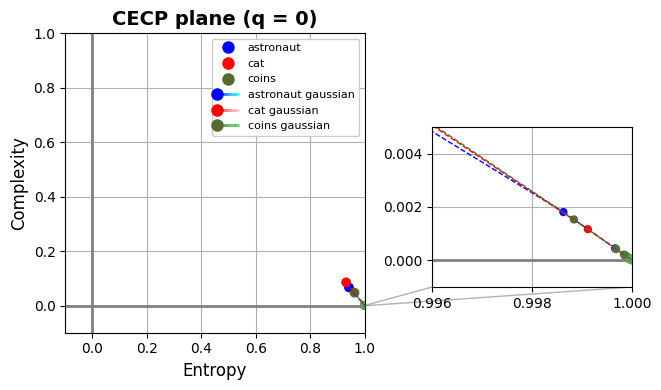

In [22]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise_sd': 'cyan',
    'data.astronaut_noise_mean': 'darkviolet',
    'data.cat': 'red',
    'data.cat_noise_sd': 'pink',
    'data.cat_noise_mean': 'sienna',
    'data.coins': 'darkolivegreen',
    'data.coins_noise_sd': 'limegreen',
    'data.coins_noise_mean': 'yellow'
}

unique_skimage_images = skimage_data['image_name'].unique()

fig, ax_main = plt.subplots(figsize=(5,4))
axins = plt.axes([0.8, 0.27, 0.4, 0.4])
gradient_handles = []
original_handles = []

for i, imageName in enumerate(unique_skimage_images):
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    base_name = imageName.split('.')[1]
    
    # Process noise_sd data with gradient
    df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0].sort_values('sd_value')
    
    if len(df_noised_sd) >= 2:
        x = df_noised_sd['Weighted Entropy Correct'].values
        y = df_noised_sd['Weighted Complexity Correct'].values
        sd = df_noised_sd['sd_value'].values
        
        # Create gradient line collection
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        original_color = figname_to_color[imageName]
        noise_color = figname_to_color[f"{imageName}_noise_sd"]
        cmap = mcolors.LinearSegmentedColormap.from_list(f"{base_name}_cmap", [original_color, noise_color])
        norm = plt.Normalize(vmin=sd.min(), vmax=sd.max())
        
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, linestyle='--', linewidth=1)
            lc.set_array(sd)
            ax.add_collection(lc)
        
        # Gradient scatter points
        colors = cmap(norm(sd))
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o')
        axins.scatter(x, y, c=colors, edgecolors='none', marker='o')
        
        gradient_handles.append(GradientLegendHandle(original_color, noise_color))
    
    # Original data point
    df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == 0)]
    original_color = figname_to_color[imageName]
    ax_main.scatter(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 
                   c=original_color, edgecolors='none', marker='o', s=50)
    axins.scatter(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 
                 c=original_color, edgecolors='none', marker='o', s=50)
    
    original_handles.append(
        plt.Line2D([], [], color=original_color, marker='o', linestyle='None',
                  label=f"{base_name}", markersize=8)
    )

# Create combined legend
all_handles = original_handles + gradient_handles
all_labels = [h.get_label() for h in original_handles] + \
            [f"{imageName.split('.')[1]} gaussian" for imageName in unique_skimage_images]

ax_main.legend(
    all_handles,
    all_labels,
    handler_map={GradientLegendHandle: HandlerGradientLines()},
    loc='best',
    framealpha=1,
    fontsize=8
)

# Configure axes
ax_main.set_title(f'CECP plane (q = {q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Entropy', fontsize=12)
ax_main.set_ylabel('Complexity', fontsize=12)
ax_main.set_xlim([-0.1, 1])
ax_main.set_ylim([-0.1, 1])
ax_main.set_aspect('equal')
ax_main.grid(True)
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')

# Inset configuration
axins.set_xlim(0.996, 1)
axins.set_ylim(-0.001, 0.005)
axins.set_aspect('auto')
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

plt.tight_layout()
plt.savefig(f'results/noise_analysis/q0/gaussian/gaussian_skimage_cecp_q{q_value}_noisegen.png', bbox_inches='tight')
plt.show()

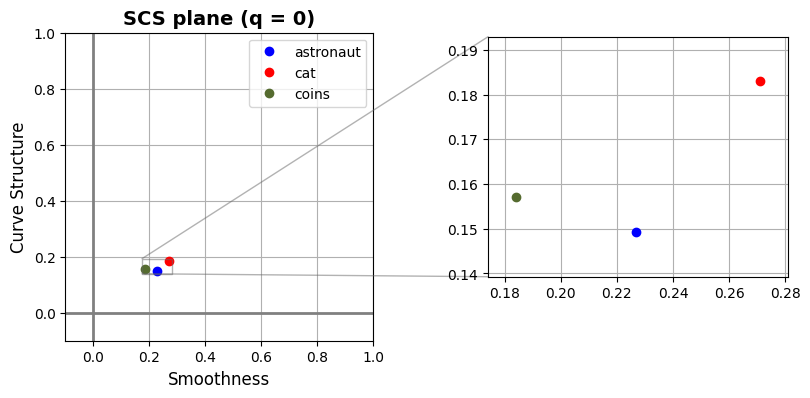

In [10]:
figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise_sd': 'cyan',
    'data.astronaut_noise_mean': 'darkviolet',
    'data.cat': 'red',
    'data.cat_noise_sd': 'pink',
    'data.cat_noise_mean': 'sienna',
    'data.coins': 'darkolivegreen',
    'data.coins_noise_sd': 'limegreen',
    'data.coins_noise_mean': 'yellow'
}
unique_skimage_images = skimage_data['image_name'].unique()

fig, ax_main =plt.subplots(figsize=(5, 4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_skimage_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    # get data varying sd and setting mean as 0
    # df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0]
    # ax_main.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} gaussian")
    # axins.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} gaussian")
    # get data varying mean and setting sd as 0
    # df_noised_mean = df_data_filtered[df_data_filtered['sd_value'] == 0]
    # ax_main.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    # axins.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == 0)]
    # plot it
    ax_main.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
    axins.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])

# Set title and labels for the subplot
ax_main.set_title(f'SCS plane (q = {q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Smoothness', fontsize=12)
ax_main.set_ylabel('Curve Structure', fontsize=12)
ax_main.set_xlim([-0.1, 1])
ax_main.set_ylim([-0.1, 1])
ax_main.set_aspect('equal')
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
ax_main.grid(True)
ax_main.legend()
df_no_noise = skimage_data[(skimage_data['sd_value'] == 0) & (skimage_data['mean_value'] == 0)]
x1, x2 = np.min(df_no_noise['Smoothness'])-0.01, np.max(df_no_noise['Smoothness'])+0.01
y1, y2 = np.min(df_no_noise['Curve structure'])-0.01, np.max(df_no_noise['Curve structure'])+0.01
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
# plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/scs_skimage.png', bbox_inches='tight')
# Show the plot
plt.show()

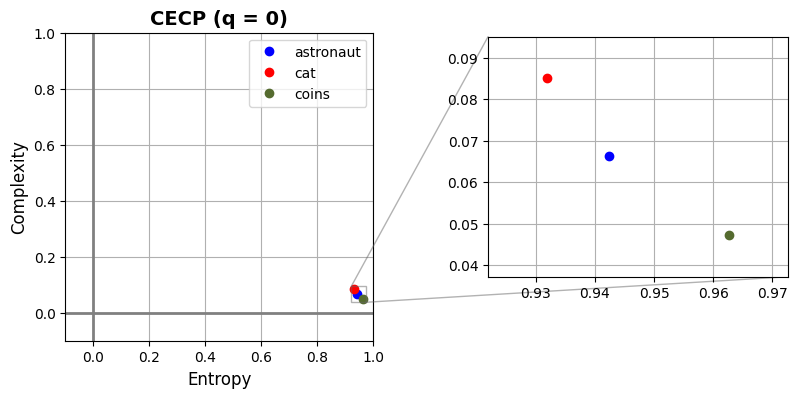

In [8]:
figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise_sd': 'cyan',
    'data.astronaut_noise_mean': 'darkviolet',
    'data.cat': 'red',
    'data.cat_noise_sd': 'pink',
    'data.cat_noise_mean': 'sienna',
    'data.coins': 'darkolivegreen',
    'data.coins_noise_sd': 'limegreen',
    'data.coins_noise_mean': 'yellow'
}
unique_skimage_images = skimage_data['image_name'].unique()

fig, ax_main =plt.subplots(figsize=(5, 4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_skimage_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    # get data varying sd and setting mean as 0
    # df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0]
    # ax_main.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} gaussian")
    # axins.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} gaussian")
    # get data varying mean and setting sd as 0
    # df_noised_mean = df_data_filtered[df_data_filtered['sd_value'] == 0]
    # ax_main.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    # axins.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == 0)]
    # plot it
    ax_main.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
    axins.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])

# Set title and labels for the subplot
ax_main.set_title(f'CECP (q = {q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Entropy', fontsize=12)
ax_main.set_ylabel('Complexity', fontsize=12)
ax_main.set_xlim([-0.1, 1.0])
ax_main.set_ylim([-0.1, 1.0])
ax_main.set_aspect('equal')
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
ax_main.grid(True)
ax_main.legend()
df_no_noise = skimage_data[(skimage_data['sd_value'] == 0) & (skimage_data['mean_value'] == 0)]
x1, x2 = np.min(df_no_noise['Weighted Entropy Correct'])-0.01, np.max(df_no_noise['Weighted Entropy Correct'])+0.01
y1, y2 = np.min(df_no_noise['Weighted Complexity Correct'])-0.01, np.max(df_no_noise['Weighted Complexity Correct'])+0.01
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
# plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/cecp_skimage.png', bbox_inches='tight')
# Show the plot
plt.show()